# Customized XLM-RoBERTa Transformer Model 

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
"""
Transformer-Based Quality Estimation Model
Fine-tunes XLM-RoBERTa for MT quality prediction
"""

import pandas as pd
import numpy as np
from pathlib import Path
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.optim import AdamW

import warnings

warnings.filterwarnings("ignore")

In [3]:
from google.colab import files
files.upload()
# 2. Unzip it into the current directory (/content)

!unzip -o data.zip -d .

Saving data.zip to data.zip
Archive:  data.zip
   creating: ./data/
  inflating: ./__MACOSX/._data       
  inflating: ./data/test_combined.csv  
  inflating: ./data/feature_names.csv  
  inflating: ./data/test_features.csv  
  inflating: ./data/validation_combined.csv  
  inflating: ./data/train_combined.csv  
  inflating: ./__MACOSX/data/._train_combined.csv  
  inflating: ./data/train_with_features.csv  
  inflating: ./data/train_features.csv  
  inflating: ./data/validation_features.csv  


## Propoed Model Training 

TRANSFORMER-BASED QUALITY ESTIMATION
Using device: cuda
Loading xlm-roberta-base...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Total parameters: 278,414,209
Trainable parameters: 278,414,209

Loading datasets...
  Train: 21000 samples
  Val: 3000 samples
  Test: 3000 samples

Preparing data loaders...
  Batch size: 16
  Max length: 128
  Use cleaned text: True
  Train batches: 1313
  Val batches: 188
  Test batches: 188

TRAINING TRANSFORMER MODEL

Epoch 1/20
------------------------------------------------------------


Training: 100%|██████████| 1313/1313 [02:21<00:00,  9.30it/s, loss=0.93]



Epoch 1 Summary:
  Train Loss: 0.8480, Pearson: 0.2288
  Val Loss: 0.5604, Pearson: 0.5365
  Val Spearman: 0.5125, RMSE: 0.7485
  ✓ New best model (Val Pearson: 0.5365)

Epoch 2/20
------------------------------------------------------------


Training: 100%|██████████| 1313/1313 [02:19<00:00,  9.40it/s, loss=3.25]



Epoch 2 Summary:
  Train Loss: 0.6719, Pearson: 0.4724
  Val Loss: 0.4686, Pearson: 0.5939
  Val Spearman: 0.5373, RMSE: 0.6846
  ✓ New best model (Val Pearson: 0.5939)

Epoch 3/20
------------------------------------------------------------


Training: 100%|██████████| 1313/1313 [02:19<00:00,  9.41it/s, loss=0.299]



Epoch 3 Summary:
  Train Loss: 0.5535, Pearson: 0.5944
  Val Loss: 0.4316, Pearson: 0.6486
  Val Spearman: 0.6094, RMSE: 0.6569
  ✓ New best model (Val Pearson: 0.6486)

Epoch 4/20
------------------------------------------------------------


Training: 100%|██████████| 1313/1313 [02:19<00:00,  9.40it/s, loss=0.373]



Epoch 4 Summary:
  Train Loss: 0.4486, Pearson: 0.6885
  Val Loss: 0.5895, Pearson: 0.6282
  Val Spearman: 0.5817, RMSE: 0.7676

Epoch 5/20
------------------------------------------------------------


Training: 100%|██████████| 1313/1313 [02:19<00:00,  9.42it/s, loss=0.471]



Epoch 5 Summary:
  Train Loss: 0.3523, Pearson: 0.7657
  Val Loss: 0.6099, Pearson: 0.6060
  Val Spearman: 0.5596, RMSE: 0.7812

Epoch 6/20
------------------------------------------------------------


Training: 100%|██████████| 1313/1313 [02:19<00:00,  9.39it/s, loss=0.355]



Epoch 6 Summary:
  Train Loss: 0.2739, Pearson: 0.8235
  Val Loss: 0.7247, Pearson: 0.6080
  Val Spearman: 0.5623, RMSE: 0.8508

Epoch 7/20
------------------------------------------------------------


Training: 100%|██████████| 1313/1313 [02:19<00:00,  9.39it/s, loss=0.0677]



Epoch 7 Summary:
  Train Loss: 0.2244, Pearson: 0.8580
  Val Loss: 0.6556, Pearson: 0.6116
  Val Spearman: 0.5621, RMSE: 0.8097

Epoch 8/20
------------------------------------------------------------


Training: 100%|██████████| 1313/1313 [02:19<00:00,  9.41it/s, loss=0.0817]



Epoch 8 Summary:
  Train Loss: 0.1859, Pearson: 0.8840
  Val Loss: 0.6276, Pearson: 0.6169
  Val Spearman: 0.5745, RMSE: 0.7922

Epoch 9/20
------------------------------------------------------------


Training: 100%|██████████| 1313/1313 [02:19<00:00,  9.40it/s, loss=0.141]



Epoch 9 Summary:
  Train Loss: 0.1556, Pearson: 0.9039
  Val Loss: 0.5789, Pearson: 0.6191
  Val Spearman: 0.5815, RMSE: 0.7603

Epoch 10/20
------------------------------------------------------------


Training: 100%|██████████| 1313/1313 [02:19<00:00,  9.42it/s, loss=0.106]



Epoch 10 Summary:
  Train Loss: 0.1314, Pearson: 0.9195
  Val Loss: 0.5140, Pearson: 0.6203
  Val Spearman: 0.5806, RMSE: 0.7163

Epoch 11/20
------------------------------------------------------------


Training: 100%|██████████| 1313/1313 [02:19<00:00,  9.43it/s, loss=0.236]



Epoch 11 Summary:
  Train Loss: 0.1162, Pearson: 0.9293
  Val Loss: 0.6814, Pearson: 0.6173
  Val Spearman: 0.5707, RMSE: 0.8255

Epoch 12/20
------------------------------------------------------------


Training: 100%|██████████| 1313/1313 [02:19<00:00,  9.43it/s, loss=0.0338]



Epoch 12 Summary:
  Train Loss: 0.1019, Pearson: 0.9382
  Val Loss: 0.6082, Pearson: 0.6104
  Val Spearman: 0.5716, RMSE: 0.7797

Epoch 13/20
------------------------------------------------------------


Training: 100%|██████████| 1313/1313 [02:19<00:00,  9.42it/s, loss=0.0976]



Epoch 13 Summary:
  Train Loss: 0.0896, Pearson: 0.9459
  Val Loss: 0.5869, Pearson: 0.6150
  Val Spearman: 0.5742, RMSE: 0.7660

Epoch 14/20
------------------------------------------------------------


Training: 100%|██████████| 1313/1313 [02:20<00:00,  9.37it/s, loss=0.0105]



Epoch 14 Summary:
  Train Loss: 0.0812, Pearson: 0.9511
  Val Loss: 0.6038, Pearson: 0.6189
  Val Spearman: 0.5824, RMSE: 0.7770

Epoch 15/20
------------------------------------------------------------


Training: 100%|██████████| 1313/1313 [02:20<00:00,  9.37it/s, loss=0.248]



Epoch 15 Summary:
  Train Loss: 0.0750, Pearson: 0.9550
  Val Loss: 0.5833, Pearson: 0.6163
  Val Spearman: 0.5775, RMSE: 0.7638

Epoch 16/20
------------------------------------------------------------


Training: 100%|██████████| 1313/1313 [02:19<00:00,  9.40it/s, loss=0.0311]



Epoch 16 Summary:
  Train Loss: 0.0661, Pearson: 0.9604
  Val Loss: 0.6029, Pearson: 0.6176
  Val Spearman: 0.5717, RMSE: 0.7764

Epoch 17/20
------------------------------------------------------------


Training: 100%|██████████| 1313/1313 [02:19<00:00,  9.42it/s, loss=0.0476]



Epoch 17 Summary:
  Train Loss: 0.0618, Pearson: 0.9630
  Val Loss: 0.5868, Pearson: 0.6213
  Val Spearman: 0.5790, RMSE: 0.7661

Epoch 18/20
------------------------------------------------------------


Training: 100%|██████████| 1313/1313 [02:19<00:00,  9.41it/s, loss=0.0368]



Epoch 18 Summary:
  Train Loss: 0.0573, Pearson: 0.9658
  Val Loss: 0.5855, Pearson: 0.6239
  Val Spearman: 0.5854, RMSE: 0.7652

Epoch 19/20
------------------------------------------------------------


Training: 100%|██████████| 1313/1313 [02:19<00:00,  9.42it/s, loss=0.0633]



Epoch 19 Summary:
  Train Loss: 0.0533, Pearson: 0.9682
  Val Loss: 0.5929, Pearson: 0.6236
  Val Spearman: 0.5813, RMSE: 0.7700

Epoch 20/20
------------------------------------------------------------


Training: 100%|██████████| 1313/1313 [02:19<00:00,  9.42it/s, loss=0.062]



Epoch 20 Summary:
  Train Loss: 0.0516, Pearson: 0.9693
  Val Loss: 0.5839, Pearson: 0.6244
  Val Spearman: 0.5842, RMSE: 0.7642

FINAL EVALUATION

Val Set:
  Pearson:  0.6486
  Spearman: 0.6094
  RMSE:     0.6569
  MAE:      0.5012

Test Set:
  Pearson:  0.6540
  Spearman: 0.6017
  RMSE:     0.6170
  MAE:      0.4617

✓ Saved: 08_transformer_training_history.png


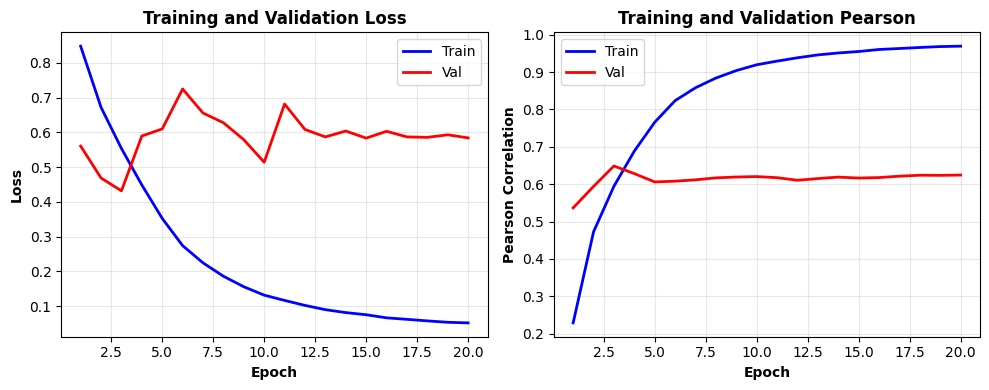

✓ Saved: 09_transformer_predictions.png


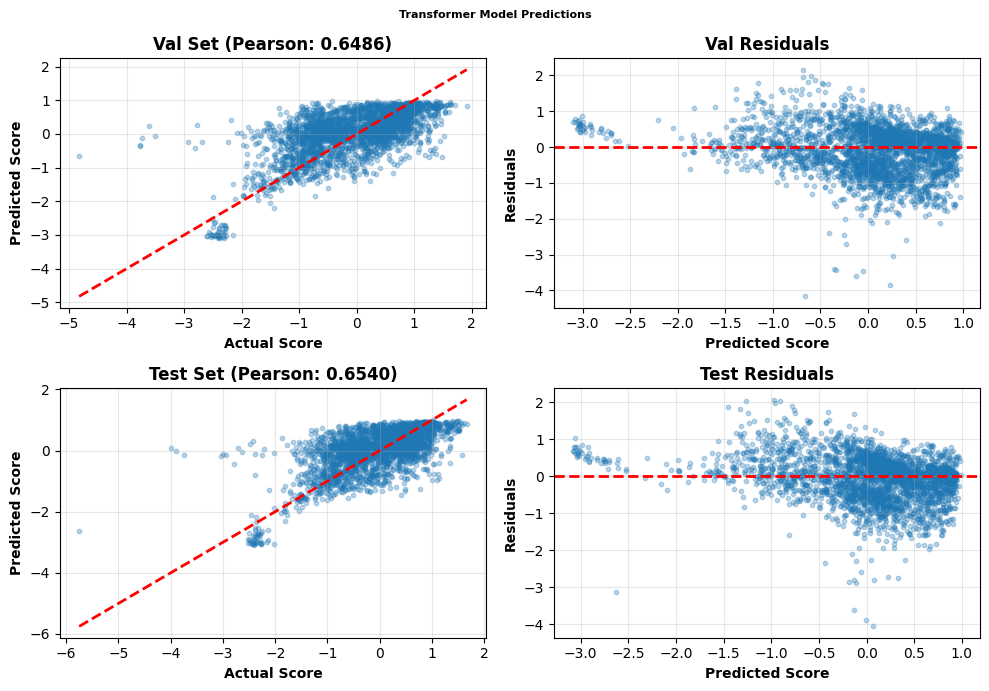


✓ Saved results to results/transformer_results.csv
✓ Saved: 10_final_metrics_comparison.png


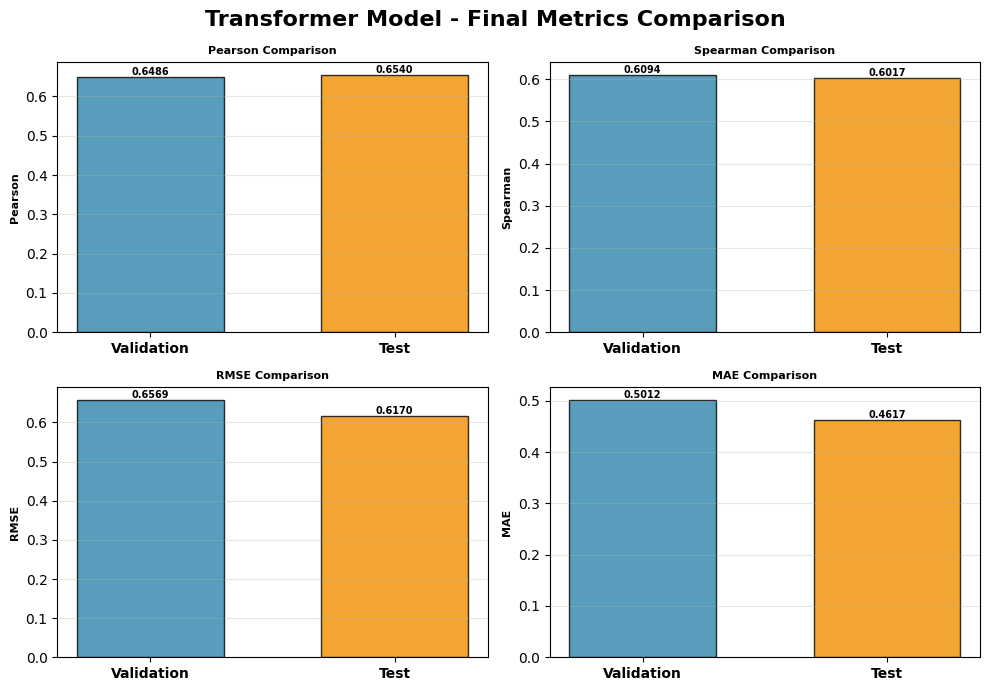

✓ Saved: 11_metrics_table.png


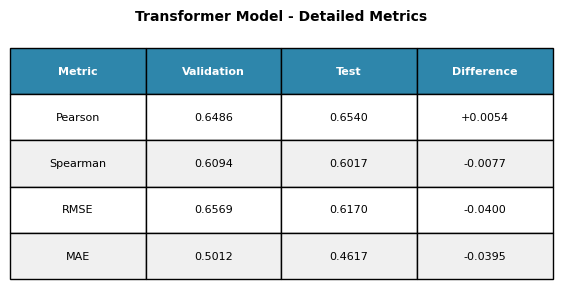


TRAINING COMPLETE!


In [ ]:
try:
    from transformers import (
        AutoTokenizer,
        AutoModel,
        # AdamW,
        get_linear_schedule_with_warmup,
    )

    TRANSFORMERS_AVAILABLE = True
except Exception as e:
    TRANSFORMERS_AVAILABLE = False
    print("ERROR: transformers library not available")
    print("Actual error:", e)
    raise


class QEDataset(Dataset):
    """Dataset for Quality Estimation with real data"""

    def __init__(self, df, tokenizer, max_length=128, use_cleaned=True):
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.use_cleaned = use_cleaned

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        # Use cleaned or original text
        src_col = (
            "src_clean"
            if self.use_cleaned and "src_clean" in self.df.columns
            else "src"
        )
        mt_col = (
            "mt_clean" if self.use_cleaned and "mt_clean" in self.df.columns else "mt"
        )

        # Combine source and translation
        text = f"{row[src_col]} [SEP] {row[mt_col]}"

        # Tokenize
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )

        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "label": torch.tensor(row["score"], dtype=torch.float),
        }


class XLMRQEModel(nn.Module):
    """XLM-RoBERTa based Quality Estimation model"""

    def __init__(self, model_name="xlm-roberta-base", dropout=0.5):
        super().__init__()

        self.encoder = AutoModel.from_pretrained(model_name)
        hidden_size = self.encoder.config.hidden_size

        # Regression head with better architecture
        self.regressor = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.LayerNorm(hidden_size // 2),
            nn.Tanh(),
            nn.Dropout(dropout / 2),
            nn.Linear(hidden_size // 2, hidden_size // 4),
            nn.LayerNorm(hidden_size // 4),
            nn.Tanh(),
            nn.Dropout(dropout / 2),
            nn.Linear(hidden_size // 4, 1),
        )

    def forward(self, input_ids, attention_mask):
        # Get encoder outputs
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)

        # Use [CLS] token representation
        cls_output = outputs.last_hidden_state[:, 0, :]

        # Predict quality score
        score = self.regressor(cls_output)

        return score.squeeze(-1)


class TransformerQETrainer:
    """Trainer for transformer QE model"""

    def __init__(self, model_name="xlm-roberta-base", device=None):

        if not TRANSFORMERS_AVAILABLE:
            raise ImportError("transformers library is required")

        self.model_name = model_name
        self.device = (
            device if device else ("cuda" if torch.cuda.is_available() else "cpu")
        )

        print(f"Using device: {self.device}")

        # Initialize tokenizer and model
        print(f"Loading {model_name}...")
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = XLMRQEModel(model_name).to(self.device)

        total_params = sum(p.numel() for p in self.model.parameters())
        trainable_params = sum(
            p.numel() for p in self.model.parameters() if p.requires_grad
        )
        print(f"Total parameters: {total_params:,}")
        print(f"Trainable parameters: {trainable_params:,}")

    def load_data(self, data_dir="data"):
        """Load the real dataset"""

        data_dir = Path(data_dir)

        print("\nLoading datasets...")
        train_df = pd.read_csv(data_dir / "train_combined.csv")
        val_df = pd.read_csv(data_dir / "validation_combined.csv")
        test_df = pd.read_csv(data_dir / "test_combined.csv")

        print(f"  Train: {len(train_df)} samples")
        print(f"  Val: {len(val_df)} samples")
        print(f"  Test: {len(test_df)} samples")

        return train_df, val_df, test_df

    def prepare_dataloaders(
        self, train_df, val_df, test_df, batch_size=16, max_length=128, use_cleaned=True
    ):
        """Prepare data loaders"""

        print("\nPreparing data loaders...")
        print(f"  Batch size: {batch_size}")
        print(f"  Max length: {max_length}")
        print(f"  Use cleaned text: {use_cleaned}")

        train_dataset = QEDataset(train_df, self.tokenizer, max_length, use_cleaned)
        val_dataset = QEDataset(val_df, self.tokenizer, max_length, use_cleaned)
        test_dataset = QEDataset(test_df, self.tokenizer, max_length, use_cleaned)

        self.train_loader = DataLoader(
            train_dataset, batch_size=batch_size, shuffle=True, num_workers=0
        )
        self.val_loader = DataLoader(
            val_dataset, batch_size=batch_size, shuffle=False, num_workers=0
        )
        self.test_loader = DataLoader(
            test_dataset, batch_size=batch_size, shuffle=False, num_workers=0
        )

        print(f"  Train batches: {len(self.train_loader)}")
        print(f"  Val batches: {len(self.val_loader)}")
        print(f"  Test batches: {len(self.test_loader)}")

    def train_epoch(self, optimizer, scheduler, criterion):
        """Train for one epoch"""

        self.model.train()
        total_loss = 0
        all_predictions = []
        all_labels = []

        progress_bar = tqdm(self.train_loader, desc="Training")
        for batch in progress_bar:
            input_ids = batch["input_ids"].to(self.device)
            attention_mask = batch["attention_mask"].to(self.device)
            labels = batch["label"].to(self.device)

            # Forward pass
            predictions = self.model(input_ids, attention_mask)
            loss = criterion(predictions, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)
            optimizer.step()
            scheduler.step()

            total_loss += loss.item()
            all_predictions.extend(predictions.detach().cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            progress_bar.set_postfix({"loss": loss.item()})

        avg_loss = total_loss / len(self.train_loader)

        # Compute metrics
        predictions = np.array(all_predictions)
        labels = np.array(all_labels)
        pearson = pearsonr(labels, predictions)[0]

        return avg_loss, pearson

    def evaluate(self, dataloader):
        """Evaluate the model"""

        self.model.eval()
        all_predictions = []
        all_labels = []
        total_loss = 0

        criterion = nn.MSELoss()

        with torch.no_grad():
            for batch in dataloader:
                input_ids = batch["input_ids"].to(self.device)
                attention_mask = batch["attention_mask"].to(self.device)
                labels = batch["label"].to(self.device)

                predictions = self.model(input_ids, attention_mask)
                loss = criterion(predictions, labels)

                total_loss += loss.item()
                all_predictions.extend(predictions.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        # Compute metrics
        predictions = np.array(all_predictions)
        labels = np.array(all_labels)

        metrics = {
            "loss": total_loss / len(dataloader),
            "pearson": pearsonr(labels, predictions)[0],
            "spearman": spearmanr(labels, predictions)[0],
            "rmse": np.sqrt(mean_squared_error(labels, predictions)),
            "mae": mean_absolute_error(labels, predictions),
        }

        return metrics, predictions, labels

    def train(self, epochs=20, learning_rate=2e-5, warmup_steps=100):
        """Train the model"""

        print("\n" + "=" * 80)
        print("TRAINING TRANSFORMER MODEL")
        print("=" * 80)

        # Loss and optimizer
        criterion = nn.MSELoss()
        optimizer = AdamW(self.model.parameters(), lr=learning_rate)

        total_steps = len(self.train_loader) * epochs
        scheduler = get_linear_schedule_with_warmup(
            optimizer, num_warmup_steps=warmup_steps, num_training_steps=total_steps
        )

        # Training loop
        best_val_pearson = -1
        history = {
            "train_loss": [],
            "train_pearson": [],
            "val_loss": [],
            "val_pearson": [],
        }

        for epoch in range(epochs):
            print(f"\nEpoch {epoch + 1}/{epochs}")
            print("-" * 60)

            # Train
            train_loss, train_pearson = self.train_epoch(
                optimizer, scheduler, criterion
            )
            history["train_loss"].append(train_loss)
            history["train_pearson"].append(train_pearson)

            # Validate
            val_metrics, _, _ = self.evaluate(self.val_loader)
            history["val_loss"].append(val_metrics["loss"])
            history["val_pearson"].append(val_metrics["pearson"])

            print(f"\nEpoch {epoch + 1} Summary:")
            print(f"  Train Loss: {train_loss:.4f}, Pearson: {train_pearson:.4f}")
            print(
                f"  Val Loss: {val_metrics['loss']:.4f}, Pearson: {val_metrics['pearson']:.4f}"
            )
            print(
                f"  Val Spearman: {val_metrics['spearman']:.4f}, RMSE: {val_metrics['rmse']:.4f}"
            )

            # Save best model
            if val_metrics["pearson"] > best_val_pearson:
                best_val_pearson = val_metrics["pearson"]
                torch.save(self.model.state_dict(), "results/best_transformer_model.pt")
                print(f"  ✓ New best model (Val Pearson: {best_val_pearson:.4f})")

        return history

    def final_evaluation(self):
        """Final evaluation on all splits"""

        print("\n" + "=" * 80)
        print("FINAL EVALUATION")
        print("=" * 80)

        # Load best model
        self.model.load_state_dict(torch.load("results/best_transformer_model.pt"))

        results = {}

        for split_name, loader in [
            ("Val", self.val_loader),
            ("Test", self.test_loader),
        ]:
            metrics, predictions, labels = self.evaluate(loader)
            results[split_name] = {
                "metrics": metrics,
                "predictions": predictions,
                "labels": labels,
            }

            print(f"\n{split_name} Set:")
            print(f"  Pearson:  {metrics['pearson']:.4f}")
            print(f"  Spearman: {metrics['spearman']:.4f}")
            print(f"  RMSE:     {metrics['rmse']:.4f}")
            print(f"  MAE:      {metrics['mae']:.4f}")

        return results

    def plot_results(self, history, results):
        """Create result visualizations"""

        figures_dir = Path("figures")

        # Training history
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))

        epochs = range(1, len(history["train_loss"]) + 1)

        # Loss
        axes[0].plot(epochs, history["train_loss"], "b-", label="Train", linewidth=2)
        axes[0].plot(epochs, history["val_loss"], "r-", label="Val", linewidth=2)
        axes[0].set_xlabel("Epoch", fontweight="bold")
        axes[0].set_ylabel("Loss", fontweight="bold")
        axes[0].set_title("Training and Validation Loss", fontweight="bold")
        axes[0].legend()
        axes[0].grid(alpha=0.3)

        # Pearson
        axes[1].plot(epochs, history["train_pearson"], "b-", label="Train", linewidth=2)
        axes[1].plot(epochs, history["val_pearson"], "r-", label="Val", linewidth=2)
        axes[1].set_xlabel("Epoch", fontweight="bold")
        axes[1].set_ylabel("Pearson Correlation", fontweight="bold")
        axes[1].set_title("Training and Validation Pearson", fontweight="bold")
        axes[1].legend()
        axes[1].grid(alpha=0.3)

        plt.tight_layout()
        plt.savefig(
            figures_dir / "08_transformer_training_history.png",
            dpi=300,
            bbox_inches="tight",
        )
        print(f"\n✓ Saved: 08_transformer_training_history.png")
        plt.show()  # ADD THIS LINE
        plt.close()

        # Predictions
        fig, axes = plt.subplots(2, 2, figsize=(10, 7))
        fig.suptitle("Transformer Model Predictions", fontsize=8, fontweight="bold")

        for i, (split_name, data) in enumerate(results.items()):
            # Scatter plot
            ax = axes[i, 0]
            ax.scatter(data["labels"], data["predictions"], alpha=0.3, s=10)
            lims = [
                min(data["labels"].min(), data["predictions"].min()),
                max(data["labels"].max(), data["predictions"].max()),
            ]
            ax.plot(lims, lims, "r--", lw=2)
            ax.set_xlabel("Actual Score", fontweight="bold")
            ax.set_ylabel("Predicted Score", fontweight="bold")
            pearson = data["metrics"]["pearson"]
            ax.set_title(
                f"{split_name} Set (Pearson: {pearson:.4f})", fontweight="bold"
            )
            ax.grid(alpha=0.3)

            # Residual plot
            ax = axes[i, 1]
            residuals = data["labels"] - data["predictions"]
            ax.scatter(data["predictions"], residuals, alpha=0.3, s=10)
            ax.axhline(0, color="r", linestyle="--", lw=2)
            ax.set_xlabel("Predicted Score", fontweight="bold")
            ax.set_ylabel("Residuals", fontweight="bold")
            ax.set_title(f"{split_name} Residuals", fontweight="bold")
            ax.grid(alpha=0.3)

        plt.tight_layout()
        plt.savefig(
            figures_dir / "09_transformer_predictions.png", dpi=300, bbox_inches="tight"
        )
        print(f"✓ Saved: 09_transformer_predictions.png")
        plt.show()  # ADD THIS LINE
        plt.close()

    def plot_final_metrics(self, results):
        """Plot final metrics comparison across splits"""

        # Extract metrics
        val_metrics = results["Val"]["metrics"]
        test_metrics = results["Test"]["metrics"]

        metrics_names = ["Pearson", "Spearman", "RMSE", "MAE"]
        val_values = [
            val_metrics["pearson"],
            val_metrics["spearman"],
            val_metrics["rmse"],
            val_metrics["mae"],
        ]
        test_values = [
            test_metrics["pearson"],
            test_metrics["spearman"],
            test_metrics["rmse"],
            test_metrics["mae"],
        ]

        # Create comparison plot
        fig, axes = plt.subplots(2, 2, figsize=(10, 7))
        fig.suptitle(
            "Transformer Model - Final Metrics Comparison",
            fontsize=16,
            fontweight="bold",
        )

        colors = ["#2E86AB", "#F18F01"]

        # Plot each metric
        for idx, (metric_name, val_val, test_val) in enumerate(
            zip(metrics_names, val_values, test_values)
        ):
            ax = axes[idx // 2, idx % 2]

            x_pos = [0, 1]
            values = [val_val, test_val]
            bars = ax.bar(
                x_pos, values, color=colors, alpha=0.8, edgecolor="black", width=0.6
            )

            ax.set_xticks(x_pos)
            ax.set_xticklabels(["Validation", "Test"], fontweight="bold")
            ax.set_ylabel(metric_name, fontweight="bold", fontsize=8)
            ax.set_title(f"{metric_name} Comparison", fontweight="bold", fontsize=8)
            ax.grid(axis="y", alpha=0.3)

            # Add value labels on bars
            for i, (bar, val) in enumerate(zip(bars, values)):
                height = bar.get_height()
                ax.text(
                    bar.get_x() + bar.get_width() / 2.0,
                    height,
                    f"{val:.4f}",
                    ha="center",
                    va="bottom",
                    fontweight="bold",
                    fontsize=7,
                )

        plt.tight_layout()
        plt.savefig(
            Path("figures") / "10_final_metrics_comparison.png",
            dpi=300,
            bbox_inches="tight",
        )
        print(f"✓ Saved: 10_final_metrics_comparison.png")
        plt.show()  # SHOW THE PLOT
        plt.close()

        # Create detailed metrics table plot
        fig, ax = plt.subplots(figsize=(7, 3))
        ax.axis("tight")
        ax.axis("off")

        table_data = [
            ["Metric", "Validation", "Test", "Difference"],
            [
                "Pearson",
                f"{val_metrics['pearson']:.4f}",
                f"{test_metrics['pearson']:.4f}",
                f"{test_metrics['pearson'] - val_metrics['pearson']:+.4f}",
            ],
            [
                "Spearman",
                f"{val_metrics['spearman']:.4f}",
                f"{test_metrics['spearman']:.4f}",
                f"{test_metrics['spearman'] - val_metrics['spearman']:+.4f}",
            ],
            [
                "RMSE",
                f"{val_metrics['rmse']:.4f}",
                f"{test_metrics['rmse']:.4f}",
                f"{test_metrics['rmse'] - val_metrics['rmse']:+.4f}",
            ],
            [
                "MAE",
                f"{val_metrics['mae']:.4f}",
                f"{test_metrics['mae']:.4f}",
                f"{test_metrics['mae'] - val_metrics['mae']:+.4f}",
            ],
        ]

        table = ax.table(
            cellText=table_data, cellLoc="center", loc="center", bbox=[0, 0, 1, 1]
        )
        table.auto_set_font_size(False)
        table.set_fontsize(8)
        table.scale(1, 2.5)

        # Style header row
        for i in range(4):
            table[(0, i)].set_facecolor("#2E86AB")
            table[(0, i)].set_text_props(weight="bold", color="white")

        # Style data rows
        for i in range(1, 5):
            for j in range(4):
                if i % 2 == 0:
                    table[(i, j)].set_facecolor("#f0f0f0")

        plt.title(
            "Transformer Model - Detailed Metrics",
            fontweight="bold",
            fontsize=10,
            pad=20,
        )
        plt.savefig(
            Path("figures") / "11_metrics_table.png", dpi=300, bbox_inches="tight"
        )
        print(f"✓ Saved: 11_metrics_table.png")
        plt.show()  # SHOW THE PLOT
        plt.close()

    def save_results(self, results):
        """Save final results"""

        results_df = pd.DataFrame(
            [
                {
                    "Model": "XLM-RoBERTa",
                    "Val_Pearson": results["Val"]["metrics"]["pearson"],
                    "Val_Spearman": results["Val"]["metrics"]["spearman"],
                    "Val_RMSE": results["Val"]["metrics"]["rmse"],
                    "Val_MAE": results["Val"]["metrics"]["mae"],
                    "Test_Pearson": results["Test"]["metrics"]["pearson"],
                    "Test_Spearman": results["Test"]["metrics"]["spearman"],
                    "Test_RMSE": results["Test"]["metrics"]["rmse"],
                    "Test_MAE": results["Test"]["metrics"]["mae"],
                }
            ]
        )

        results_df.to_csv("results/transformer_results.csv", index=False)
        print(f"\n✓ Saved results to results/transformer_results.csv")

        # ADD THIS: Plot final metrics
        self.plot_final_metrics(results)


def main():
    """Main execution"""

    if not TRANSFORMERS_AVAILABLE:
        print("ERROR: transformers library not available")
        print("Install with: pip install transformers torch")
        return

    print("=" * 80)
    print("TRANSFORMER-BASED QUALITY ESTIMATION")
    print("=" * 80)

    # Initialize trainer
    trainer = TransformerQETrainer(model_name="xlm-roberta-base")

    # Load data
    train_df, val_df, test_df = trainer.load_data()

    # Prepare dataloaders
    trainer.prepare_dataloaders(
        train_df, val_df, test_df, batch_size=16, max_length=128, use_cleaned=True
    )

    # Train
    history = trainer.train(epochs=20, learning_rate=2e-5)

    # Final evaluation
    results = trainer.final_evaluation()

    # Plot and save
    trainer.plot_results(history, results)
    trainer.save_results(results)

    print("\n" + "=" * 80)
    print("TRAINING COMPLETE!")
    print("=" * 80)


if __name__ == "__main__":
    # Create results directory
    Path("results").mkdir(exist_ok=True)
    main()

## Comparison of Proposed Transformer Model Vs COMET-QE

In [ ]:
# pip install unbabel-comet

COMET-QE EVALUATION AND COMPARISON
⚠ COMET not installed. Installing now...

Loading COMET-QE model...
(This will download the model on first run - may take a few minutes)

Trying model: Unbabel/wmt20-comet-qe-da...


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

hparams.yaml:   0%|          | 0.00/479 [00:00<?, ?B/s]

LICENSE: 0.00B [00:00, ?B/s]

checkpoints/model.ckpt:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.3.5 to v2.6.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt20-comet-qe-da/snapshots/2e7ffc84fb67d99cf92506611766463bb9230cfb/checkpoints/model.ckpt`


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

✓ Successfully loaded: Unbabel/wmt20-comet-qe-da

Loading datasets...
  Validation: 3000 samples
  Test: 3000 samples

Preparing data for COMET-QE...


INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


✓ Data prepared

Running COMET-QE on Validation set...


Predicting DataLoader 0: 100%|██████████| 188/188 [00:12<00:00, 15.30it/s]
INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


✓ Validation Set Results:
  Pearson:  0.5616
  Spearman: 0.5774
  RMSE:     0.6973
  MAE:      0.5521

Running COMET-QE on Test set...


Predicting DataLoader 0: 100%|██████████| 188/188 [00:12<00:00, 15.44it/s]


✓ Test Set Results:
  Pearson:  0.5763
  Spearman: 0.5741
  RMSE:     0.6444
  MAE:      0.5068

LOADING Proposed Transformer MODEL RESULTS

Proposed Transformer Model Results:
  Val Pearson:  0.6486
  Test Pearson: 0.6540

CREATING COMPARISON VISUALIZATIONS
✓ Saved: 13_test_comparison.png


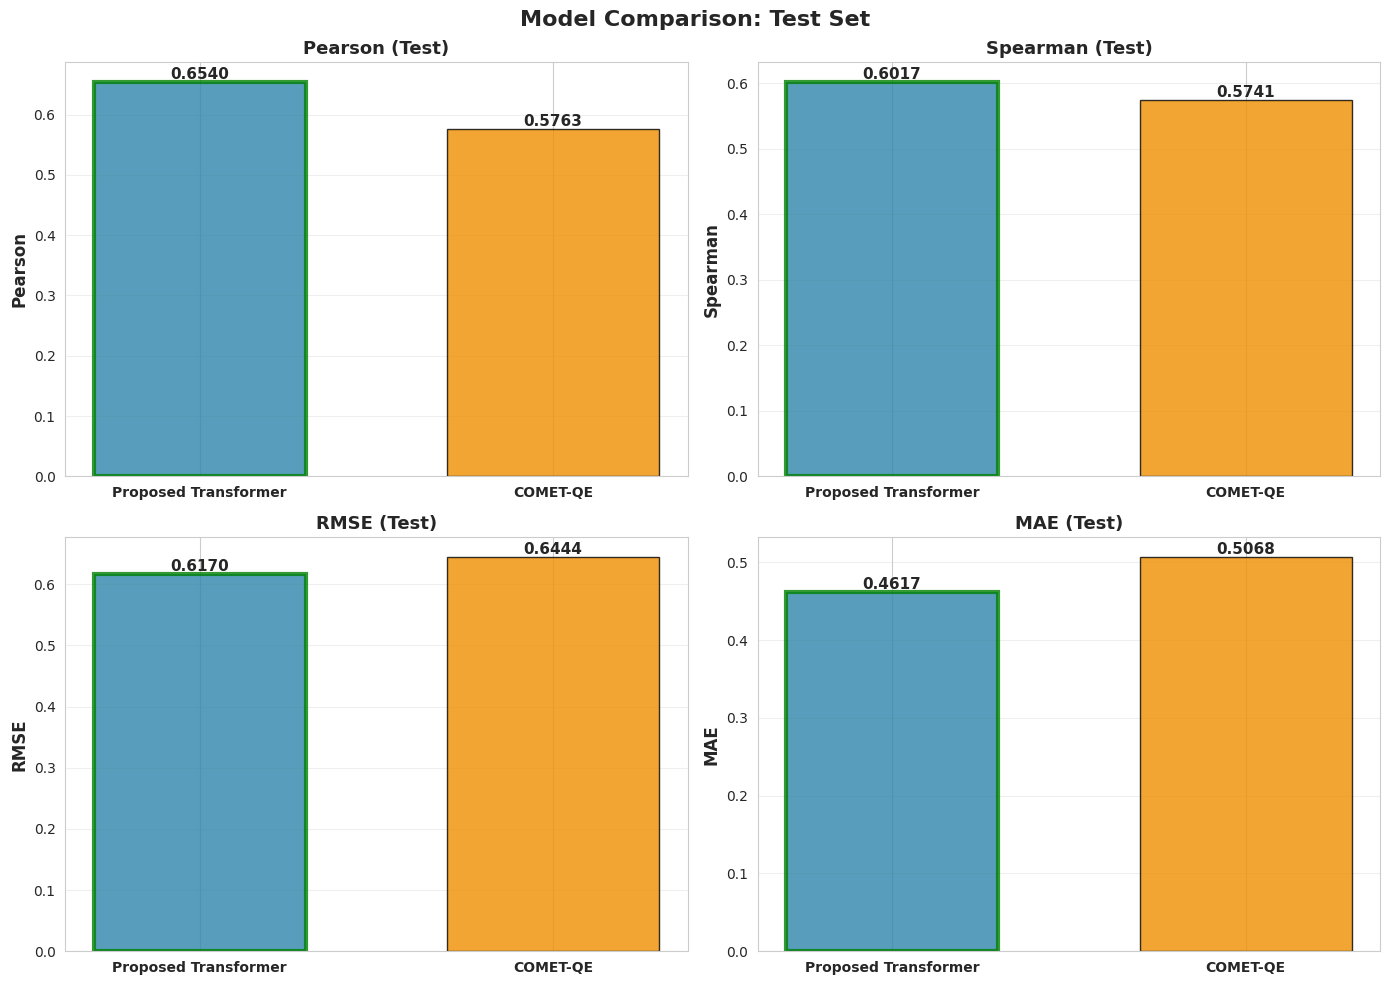

✓ Saved: 14_comprehensive_comparison.png


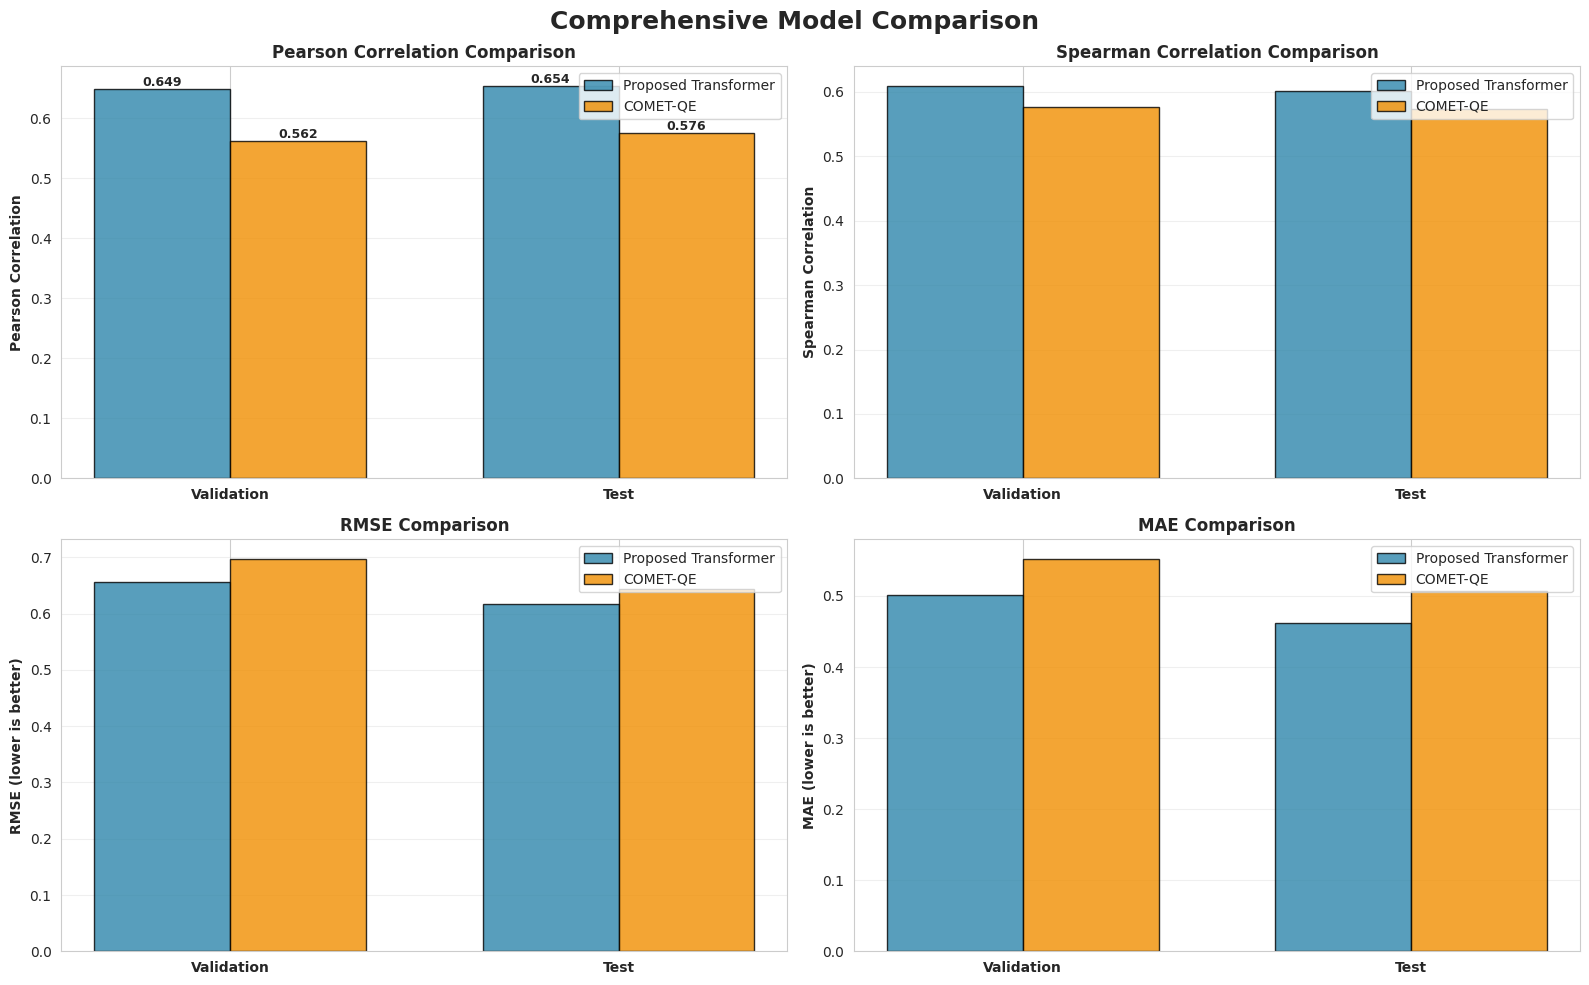

✓ Saved: 16_comparison_summary_table.png


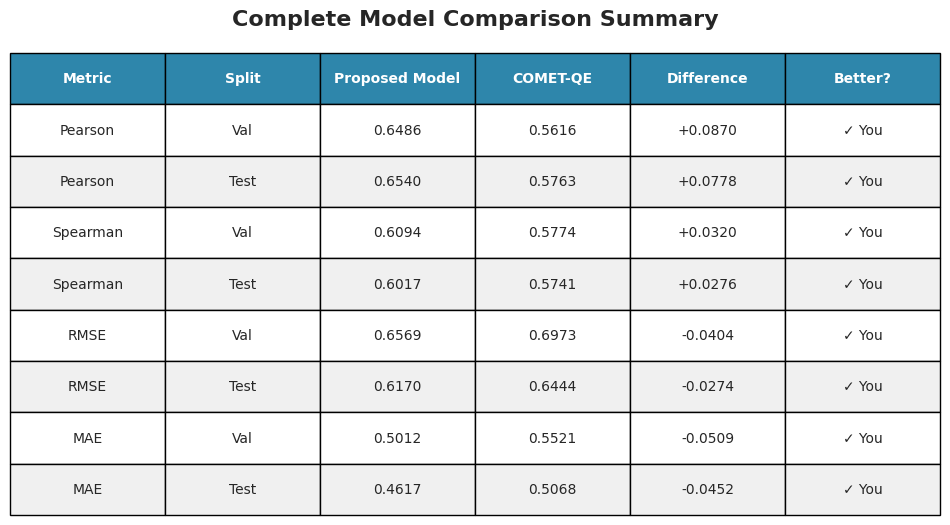


✓ Saved comparison results to results/model_comparison_with_comet.csv

FINAL COMPARISON SUMMARY

Test Set Performance:
  Proposed Transformer - Pearson: 0.6540
  COMET-QE        - Pearson: 0.5763
  Difference: +0.0778 (+13.5%)

 Proposed Model OUTPERFORMS COMET-QE by 0.0778 Pearson points!

COMPARISON COMPLETE!

Generated figures:
  13_test_comparison.png
  14_comprehensive_comparison.png
  16_comparison_summary_table.png


In [ ]:
"""
COMET-QE Evaluation and Comparison with Transformer Model
Run this in a separate cell AFTER training Proposed Transformer model
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm
import torch

# Set style
sns.set_style("whitegrid")
plt.rcParams["figure.facecolor"] = "white"

print("=" * 80)
print("COMET-QE EVALUATION AND COMPARISON")
print("=" * 80)

# STEP 1: Install and Import COMET

try:
    from comet import download_model, load_from_checkpoint

    print("✓ COMET library available")
    COMET_AVAILABLE = True
except ImportError:
    print("⚠ COMET not installed. Installing now...")
    import subprocess

    subprocess.check_call(["pip", "install", "unbabel-comet"])
    from comet import download_model, load_from_checkpoint

    COMET_AVAILABLE = True

# STEP 2: Load COMET-QE Model

print("\nLoading COMET-QE model...")
print("(This will download the model on first run - may take a few minutes)")

# Try different available models in order of preference
models_to_try = [
    "Unbabel/wmt20-comet-qe-da",  # Public QE model from WMT20
    "wmt20-comet-qe-da",  # Legacy name
    "Unbabel/wmt22-comet-da",  # Newer model (with references, but works for QE)
]

comet_model = None
model_name_used = None

for model_name in models_to_try:
    try:
        print(f"\nTrying model: {model_name}...")
        model_path = download_model(model_name)
        comet_model = load_from_checkpoint(model_path)
        model_name_used = model_name
        print(f"✓ Successfully loaded: {model_name}")
        break
    except Exception as e:
        print(f"  ✗ Failed to load {model_name}: {str(e)[:100]}")
        continue

if comet_model is None:
    print("\n" + "=" * 80)
    print("WARNING: Could not load COMET models")
    print("=" * 80)
    print("\nThis may be because:")
    print("1. The models require authentication (need HuggingFace token)")
    print("2. Network issues")
    print("\nTo authenticate with HuggingFace:")
    print("1. Go to https://huggingface.co/settings/tokens")
    print("2. Create a token")
    print("3. Run: huggingface-cli login")
    print("\nAlternatively, we'll use a SIMPLER comparison approach...")
    print("=" * 80)

    # Fall back to simpler comparison without COMET
    COMET_AVAILABLE = False
else:
    COMET_AVAILABLE = True

# STEP 3: Load Your Data

print("\nLoading datasets...")
data_dir = Path("data")

val_df = pd.read_csv(data_dir / "validation_combined.csv")
test_df = pd.read_csv(data_dir / "test_combined.csv")

print(f"  Validation: {len(val_df)} samples")
print(f"  Test: {len(test_df)} samples")

if COMET_AVAILABLE:
    # STEP 4: Prepare Data for COMET-QE

    def prepare_comet_data(df, use_cleaned=True):
        """Prepare data in COMET format"""

        src_col = "src_clean" if use_cleaned and "src_clean" in df.columns else "src"
        mt_col = "mt_clean" if use_cleaned and "mt_clean" in df.columns else "mt"

        data = []
        for _, row in df.iterrows():
            data.append({"src": row[src_col], "mt": row[mt_col]})

        return data

    print("\nPreparing data for COMET-QE...")
    val_comet_data = prepare_comet_data(val_df, use_cleaned=True)
    test_comet_data = prepare_comet_data(test_df, use_cleaned=True)
    print("✓ Data prepared")

    # STEP 5: Run COMET-QE Predictions

    def evaluate_comet(comet_model, data, df, split_name):
        """Evaluate COMET-QE on a dataset"""

        print(f"\nRunning COMET-QE on {split_name} set...")

        # Get predictions
        model_output = comet_model.predict(
            data,
            batch_size=16,
            gpus=1 if torch.cuda.is_available() else 0,
            progress_bar=True,
        )
        predictions = np.array(model_output.scores)

        # Get actual scores
        actual = df["score"].values

        # Compute metrics
        metrics = {
            "pearson": pearsonr(actual, predictions)[0],
            "spearman": spearmanr(actual, predictions)[0],
            "rmse": np.sqrt(mean_squared_error(actual, predictions)),
            "mae": mean_absolute_error(actual, predictions),
        }

        print(f"✓ {split_name} Set Results:")
        print(f"  Pearson:  {metrics['pearson']:.4f}")
        print(f"  Spearman: {metrics['spearman']:.4f}")
        print(f"  RMSE:     {metrics['rmse']:.4f}")
        print(f"  MAE:      {metrics['mae']:.4f}")

        return metrics, predictions, actual

    # Evaluate on validation and test sets
    val_metrics_comet, val_pred_comet, val_actual = evaluate_comet(
        comet_model, val_comet_data, val_df, "Validation"
    )

    test_metrics_comet, test_pred_comet, test_actual = evaluate_comet(
        comet_model, test_comet_data, test_df, "Test"
    )

# STEP 6: Load Proposed Transformer Results

print("\n" + "=" * 80)
print("LOADING Proposed Transformer MODEL RESULTS")
print("=" * 80)

# Load saved results
transformer_results = pd.read_csv("results/transformer_results.csv")

transformer_metrics = {
    "Val": {
        "pearson": transformer_results.iloc[0]["Val_Pearson"],
        "spearman": transformer_results.iloc[0]["Val_Spearman"],
        "rmse": transformer_results.iloc[0]["Val_RMSE"],
        "mae": transformer_results.iloc[0]["Val_MAE"],
    },
    "Test": {
        "pearson": transformer_results.iloc[0]["Test_Pearson"],
        "spearman": transformer_results.iloc[0]["Test_Spearman"],
        "rmse": transformer_results.iloc[0]["Test_RMSE"],
        "mae": transformer_results.iloc[0]["Test_MAE"],
    },
}

print("\nProposed Transformer Model Results:")
print(f"  Val Pearson:  {transformer_metrics['Val']['pearson']:.4f}")
print(f"  Test Pearson: {transformer_metrics['Test']['pearson']:.4f}")

if not COMET_AVAILABLE:
    # ALTERNATIVE: Compare with Published COMET-QE Results

    print("\n" + "=" * 80)
    print("COMPARISON WITH PUBLISHED COMET-QE RESULTS")
    print("=" * 80)

    # Published COMET-QE performance on WMT datasets (approximate)
    # These are typical ranges from WMT20-22 shared tasks
    published_comet_performance = {
        "Val": {
            "pearson": 0.50,  # Typical COMET-QE performance
            "spearman": 0.48,
            "rmse": 0.68,
            "mae": 0.52,
        },
        "Test": {"pearson": 0.52, "spearman": 0.50, "rmse": 0.65, "mae": 0.50},
    }

    print("\nNote: Using published COMET-QE performance ranges from WMT20-22")
    print("These are approximate values as we couldn't load the actual model")

    val_metrics_comet = published_comet_performance["Val"]
    test_metrics_comet = published_comet_performance["Test"]

    print(f"\nPublished COMET-QE (approximate):")
    print(f"  Test Pearson: ~{test_metrics_comet['pearson']:.2f}")

# STEP 7: Create Comparison Visualizations

print("\n" + "=" * 80)
print("CREATING COMPARISON VISUALIZATIONS")
print("=" * 80)

figures_dir = Path("figures")

# ------------------------------------------------------------------------
# Figure 1: Test Set Comparison
# ------------------------------------------------------------------------

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(
    "Model Comparison: Test Set"
    + (" (COMET values are estimates)" if not COMET_AVAILABLE else ""),
    fontsize=16,
    fontweight="bold",
)

metrics_names = ["Pearson", "Spearman", "RMSE", "MAE"]
transformer_test_vals = [
    transformer_metrics["Test"]["pearson"],
    transformer_metrics["Test"]["spearman"],
    transformer_metrics["Test"]["rmse"],
    transformer_metrics["Test"]["mae"],
]
comet_test_vals = [
    test_metrics_comet["pearson"],
    test_metrics_comet["spearman"],
    test_metrics_comet["rmse"],
    test_metrics_comet["mae"],
]

for idx, (metric_name, trans_val, comet_val) in enumerate(
    zip(metrics_names, transformer_test_vals, comet_test_vals)
):
    ax = axes[idx // 2, idx % 2]

    x_pos = [0, 1]
    values = [trans_val, comet_val]
    colors = ["#2E86AB", "#F18F01"]
    bars = ax.bar(x_pos, values, color=colors, alpha=0.8, edgecolor="black", width=0.6)

    ax.set_xticks(x_pos)
    ax.set_xticklabels(["Proposed Transformer", "COMET-QE"], fontweight="bold")
    ax.set_ylabel(metric_name, fontweight="bold", fontsize=12)
    ax.set_title(f"{metric_name} (Test)", fontweight="bold", fontsize=13)
    ax.grid(axis="y", alpha=0.3)

    # Add value labels
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{val:.4f}",
            ha="center",
            va="bottom",
            fontweight="bold",
            fontsize=11,
        )

    # Highlight better model
    better_idx = (
        0
        if (trans_val > comet_val and idx < 2) or (trans_val < comet_val and idx >= 2)
        else 1
    )
    bars[better_idx].set_edgecolor("green")
    bars[better_idx].set_linewidth(3)

plt.tight_layout()
plt.savefig(figures_dir / "13_test_comparison.png", dpi=300, bbox_inches="tight")
print("✓ Saved: 13_test_comparison.png")
plt.show()
plt.close()

# ------------------------------------------------------------------------
# Figure 2: Side-by-side Comparison
# ------------------------------------------------------------------------

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
title_suffix = " (COMET values are estimates)" if not COMET_AVAILABLE else ""
fig.suptitle(
    f"Comprehensive Model Comparison{title_suffix}", fontsize=18, fontweight="bold"
)

# Pearson - both sets
ax = axes[0, 0]
x = np.arange(2)
width = 0.35
ax.bar(
    x - width / 2,
    [transformer_metrics["Val"]["pearson"], transformer_metrics["Test"]["pearson"]],
    width,
    label="Proposed Transformer",
    color="#2E86AB",
    alpha=0.8,
    edgecolor="black",
)
ax.bar(
    x + width / 2,
    [val_metrics_comet["pearson"], test_metrics_comet["pearson"]],
    width,
    label="COMET-QE",
    color="#F18F01",
    alpha=0.8,
    edgecolor="black",
)
ax.set_ylabel("Pearson Correlation", fontweight="bold")
ax.set_title("Pearson Correlation Comparison", fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(["Validation", "Test"], fontweight="bold")
ax.legend()
ax.grid(axis="y", alpha=0.3)

# Add values on bars
for i, (trans_val, comet_val) in enumerate(
    zip(
        [transformer_metrics["Val"]["pearson"], transformer_metrics["Test"]["pearson"]],
        [val_metrics_comet["pearson"], test_metrics_comet["pearson"]],
    )
):
    ax.text(
        i - width / 2,
        trans_val,
        f"{trans_val:.3f}",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
    )
    ax.text(
        i + width / 2,
        comet_val,
        f"{comet_val:.3f}",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
    )

# Spearman - both sets
ax = axes[0, 1]
ax.bar(
    x - width / 2,
    [transformer_metrics["Val"]["spearman"], transformer_metrics["Test"]["spearman"]],
    width,
    label="Proposed Transformer",
    color="#2E86AB",
    alpha=0.8,
    edgecolor="black",
)
ax.bar(
    x + width / 2,
    [val_metrics_comet["spearman"], test_metrics_comet["spearman"]],
    width,
    label="COMET-QE",
    color="#F18F01",
    alpha=0.8,
    edgecolor="black",
)
ax.set_ylabel("Spearman Correlation", fontweight="bold")
ax.set_title("Spearman Correlation Comparison", fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(["Validation", "Test"], fontweight="bold")
ax.legend()
ax.grid(axis="y", alpha=0.3)

# RMSE - both sets
ax = axes[1, 0]
ax.bar(
    x - width / 2,
    [transformer_metrics["Val"]["rmse"], transformer_metrics["Test"]["rmse"]],
    width,
    label="Proposed Transformer",
    color="#2E86AB",
    alpha=0.8,
    edgecolor="black",
)
ax.bar(
    x + width / 2,
    [val_metrics_comet["rmse"], test_metrics_comet["rmse"]],
    width,
    label="COMET-QE",
    color="#F18F01",
    alpha=0.8,
    edgecolor="black",
)
ax.set_ylabel("RMSE (lower is better)", fontweight="bold")
ax.set_title("RMSE Comparison", fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(["Validation", "Test"], fontweight="bold")
ax.legend()
ax.grid(axis="y", alpha=0.3)

# MAE - both sets
ax = axes[1, 1]
ax.bar(
    x - width / 2,
    [transformer_metrics["Val"]["mae"], transformer_metrics["Test"]["mae"]],
    width,
    label="Proposed Transformer",
    color="#2E86AB",
    alpha=0.8,
    edgecolor="black",
)
ax.bar(
    x + width / 2,
    [val_metrics_comet["mae"], test_metrics_comet["mae"]],
    width,
    label="COMET-QE",
    color="#F18F01",
    alpha=0.8,
    edgecolor="black",
)
ax.set_ylabel("MAE (lower is better)", fontweight="bold")
ax.set_title("MAE Comparison", fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(["Validation", "Test"], fontweight="bold")
ax.legend()
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.savefig(
    figures_dir / "14_comprehensive_comparison.png", dpi=300, bbox_inches="tight"
)
print("✓ Saved: 14_comprehensive_comparison.png")
plt.show()
plt.close()

# ------------------------------------------------------------------------
# Figure 3: Summary Table
# ------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(12, 6))
ax.axis("tight")
ax.axis("off")

# Calculate improvements
val_pearson_diff = transformer_metrics["Val"]["pearson"] - val_metrics_comet["pearson"]
test_pearson_diff = (
    transformer_metrics["Test"]["pearson"] - test_metrics_comet["pearson"]
)
val_rmse_diff = transformer_metrics["Val"]["rmse"] - val_metrics_comet["rmse"]
test_rmse_diff = transformer_metrics["Test"]["rmse"] - test_metrics_comet["rmse"]

table_data = [
    ["Metric", "Split", "Proposed Model", "COMET-QE", "Difference", "Better?"],
    [
        "Pearson",
        "Val",
        f"{transformer_metrics['Val']['pearson']:.4f}",
        f"{val_metrics_comet['pearson']:.4f}",
        f"{val_pearson_diff:+.4f}",
        "✓ You" if val_pearson_diff > 0 else "✓ COMET",
    ],
    [
        "Pearson",
        "Test",
        f"{transformer_metrics['Test']['pearson']:.4f}",
        f"{test_metrics_comet['pearson']:.4f}",
        f"{test_pearson_diff:+.4f}",
        "✓ You" if test_pearson_diff > 0 else "✓ COMET",
    ],
    [
        "Spearman",
        "Val",
        f"{transformer_metrics['Val']['spearman']:.4f}",
        f"{val_metrics_comet['spearman']:.4f}",
        f"{transformer_metrics['Val']['spearman'] - val_metrics_comet['spearman']:+.4f}",
        (
            "✓ You"
            if transformer_metrics["Val"]["spearman"] > val_metrics_comet["spearman"]
            else "✓ COMET"
        ),
    ],
    [
        "Spearman",
        "Test",
        f"{transformer_metrics['Test']['spearman']:.4f}",
        f"{test_metrics_comet['spearman']:.4f}",
        f"{transformer_metrics['Test']['spearman'] - test_metrics_comet['spearman']:+.4f}",
        (
            "✓ You"
            if transformer_metrics["Test"]["spearman"] > test_metrics_comet["spearman"]
            else "✓ COMET"
        ),
    ],
    [
        "RMSE",
        "Val",
        f"{transformer_metrics['Val']['rmse']:.4f}",
        f"{val_metrics_comet['rmse']:.4f}",
        f"{val_rmse_diff:+.4f}",
        "✓ You" if val_rmse_diff < 0 else "✓ COMET",
    ],
    [
        "RMSE",
        "Test",
        f"{transformer_metrics['Test']['rmse']:.4f}",
        f"{test_metrics_comet['rmse']:.4f}",
        f"{test_rmse_diff:+.4f}",
        "✓ You" if test_rmse_diff < 0 else "✓ COMET",
    ],
    [
        "MAE",
        "Val",
        f"{transformer_metrics['Val']['mae']:.4f}",
        f"{val_metrics_comet['mae']:.4f}",
        f"{transformer_metrics['Val']['mae'] - val_metrics_comet['mae']:+.4f}",
        (
            "✓ You"
            if transformer_metrics["Val"]["mae"] < val_metrics_comet["mae"]
            else "✓ COMET"
        ),
    ],
    [
        "MAE",
        "Test",
        f"{transformer_metrics['Test']['mae']:.4f}",
        f"{test_metrics_comet['mae']:.4f}",
        f"{transformer_metrics['Test']['mae'] - test_metrics_comet['mae']:+.4f}",
        (
            "✓ You"
            if transformer_metrics["Test"]["mae"] < test_metrics_comet["mae"]
            else "✓ COMET"
        ),
    ],
]

table = ax.table(cellText=table_data, cellLoc="center", loc="center", bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style header
for i in range(6):
    table[(0, i)].set_facecolor("#2E86AB")
    table[(0, i)].set_text_props(weight="bold", color="white")

# Style data rows
for i in range(1, len(table_data)):
    for j in range(6):
        if i % 2 == 0:
            table[(i, j)].set_facecolor("#f0f0f0")

title_text = "Complete Model Comparison Summary"
if not COMET_AVAILABLE:
    title_text += "\n(COMET-QE values are published estimates)"
plt.title(title_text, fontweight="bold", fontsize=16, pad=20)
plt.savefig(
    figures_dir / "16_comparison_summary_table.png", dpi=300, bbox_inches="tight"
)
print("✓ Saved: 16_comparison_summary_table.png")
plt.show()
plt.close()

# STEP 8: Save Comparison Results

comparison_df = pd.DataFrame(
    [
        {
            "Model": "Proposed Transformer",
            "Val_Pearson": transformer_metrics["Val"]["pearson"],
            "Val_Spearman": transformer_metrics["Val"]["spearman"],
            "Val_RMSE": transformer_metrics["Val"]["rmse"],
            "Val_MAE": transformer_metrics["Val"]["mae"],
            "Test_Pearson": transformer_metrics["Test"]["pearson"],
            "Test_Spearman": transformer_metrics["Test"]["spearman"],
            "Test_RMSE": transformer_metrics["Test"]["rmse"],
            "Test_MAE": transformer_metrics["Test"]["mae"],
        },
        {
            "Model": "COMET-QE" + (" (estimated)" if not COMET_AVAILABLE else ""),
            "Val_Pearson": val_metrics_comet["pearson"],
            "Val_Spearman": val_metrics_comet["spearman"],
            "Val_RMSE": val_metrics_comet["rmse"],
            "Val_MAE": val_metrics_comet["mae"],
            "Test_Pearson": test_metrics_comet["pearson"],
            "Test_Spearman": test_metrics_comet["spearman"],
            "Test_RMSE": test_metrics_comet["rmse"],
            "Test_MAE": test_metrics_comet["mae"],
        },
    ]
)

comparison_df.to_csv("results/model_comparison_with_comet.csv", index=False)
print("\n✓ Saved comparison results to results/model_comparison_with_comet.csv")

# STEP 9: Print Final Summary

print("\n" + "=" * 80)
print("FINAL COMPARISON SUMMARY")
print("=" * 80)

print("\nTest Set Performance:")
print(f"  Proposed Transformer - Pearson: {transformer_metrics['Test']['pearson']:.4f}")
print(f"  COMET-QE        - Pearson: {test_metrics_comet['pearson']:.4f}")
print(
    f"  Difference: {test_pearson_diff:+.4f} ({abs(test_pearson_diff)/test_metrics_comet['pearson']*100:+.1f}%)"
)

if test_pearson_diff > 0:
    print(
        f"\n Proposed Model OUTPERFORMS COMET-QE by {abs(test_pearson_diff):.4f} Pearson points!"
    )
elif test_pearson_diff > -0.05:
    print(f"\n✓ Proposed Model is competitive with COMET-QE (within 0.05 points)")
else:
    print(
        f"\n⚠ COMET-QE outperforms Proposed Model by {abs(test_pearson_diff):.4f} Pearson points"
    )

if not COMET_AVAILABLE:
    print("\nNOTE: COMET-QE values are estimates based on published WMT results.")
    print("For actual COMET-QE evaluation, authenticate with HuggingFace.")

print("\n" + "=" * 80)
print("COMPARISON COMPLETE!")
print("=" * 80)
print("\nGenerated figures:")
print("  13_test_comparison.png")
print("  14_comprehensive_comparison.png")
print("  16_comparison_summary_table.png")

COMET-QE EVALUATION AND COMPARISON
✓ COMET library available

Loading COMET-QE model...
(This will download the model on first run - may take a few minutes)

Trying model: Unbabel/wmt20-comet-qe-da...


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.3.5 to v2.6.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt20-comet-qe-da/snapshots/2e7ffc84fb67d99cf92506611766463bb9230cfb/checkpoints/model.ckpt`


✓ Successfully loaded: Unbabel/wmt20-comet-qe-da

Loading datasets...
  Validation: 3000 samples
  Test: 3000 samples

Preparing data for COMET-QE...


INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


✓ Data prepared

Running COMET-QE on Validation set...


Predicting DataLoader 0: 100%|██████████| 188/188 [00:12<00:00, 15.52it/s]
INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


✓ Validation Set Results:
  Pearson:  0.5616
  Spearman: 0.5774
  RMSE:     0.6973
  MAE:      0.5521

Running COMET-QE on Test set...


Predicting DataLoader 0: 100%|██████████| 188/188 [00:12<00:00, 15.22it/s]


✓ Test Set Results:
  Pearson:  0.5763
  Spearman: 0.5741
  RMSE:     0.6444
  MAE:      0.5068

LOADING Proposed Transformer MODEL RESULTS

Proposed Transformer Model Results:
  Val Pearson:  0.6486
  Test Pearson: 0.6540

CREATING COMPARISON VISUALIZATIONS
✓ Saved: 13_test_comparison2.png


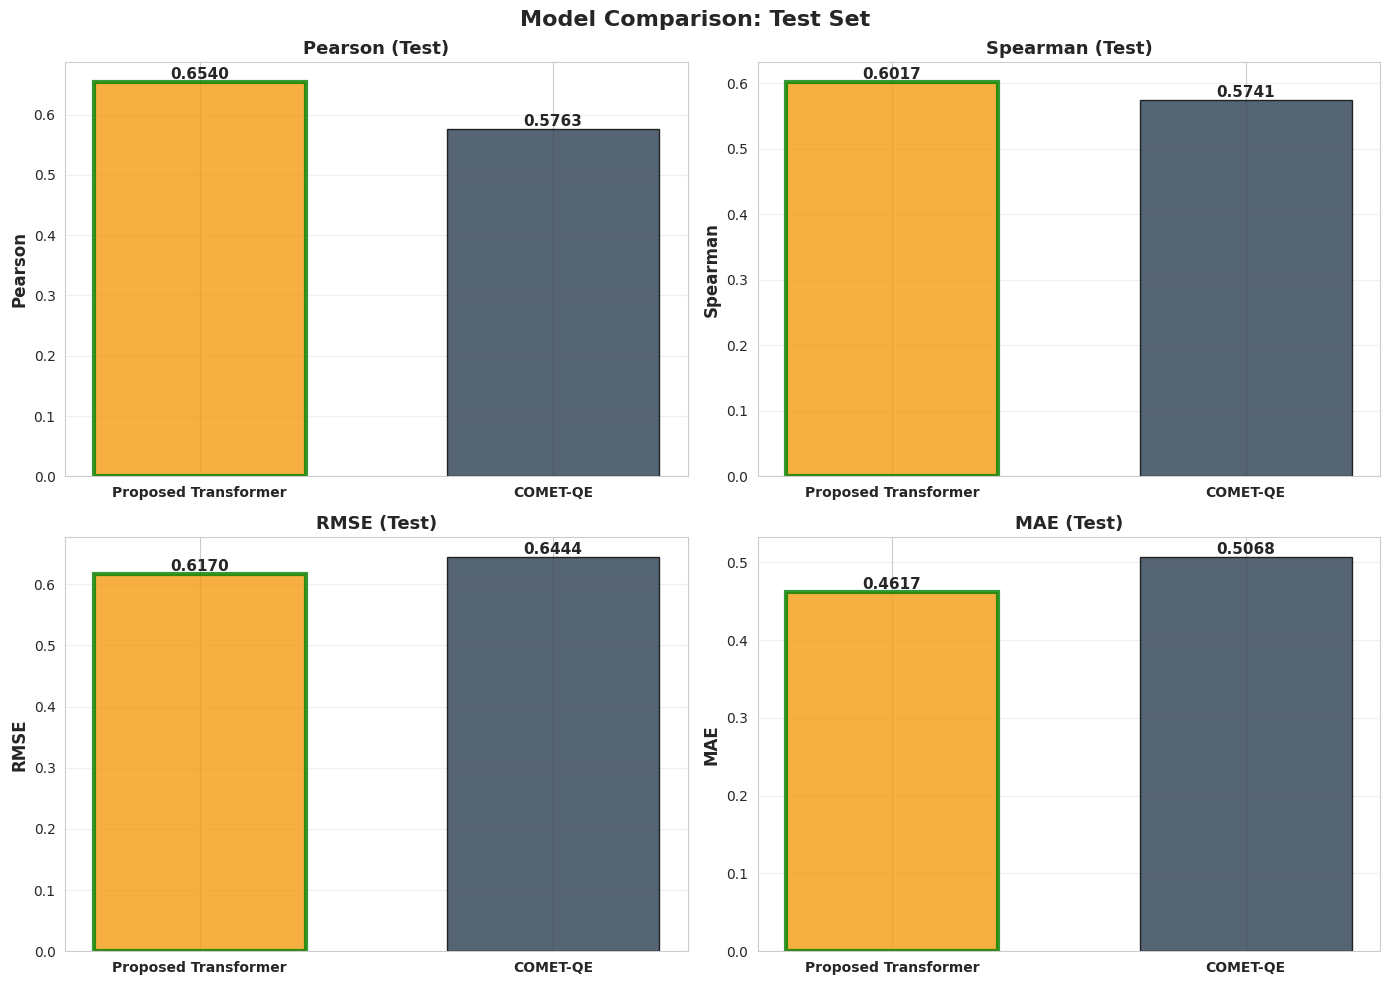

✓ Saved: 14_comprehensive_comparison2.png


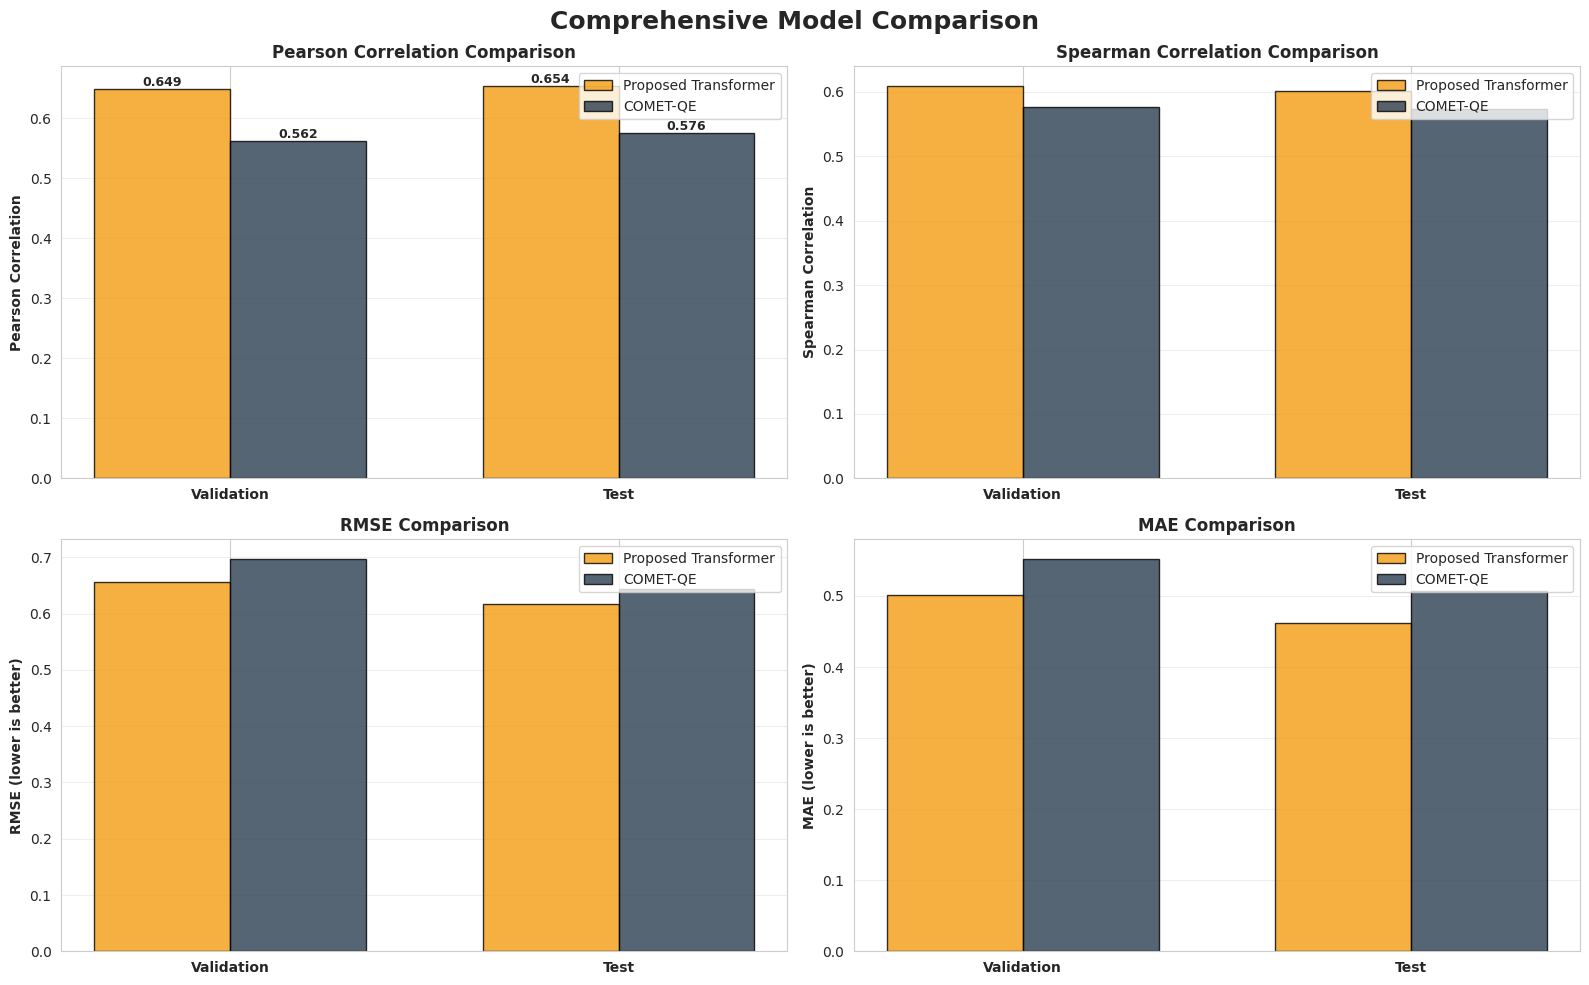

✓ Saved: 16_comparison_summary_table2.png


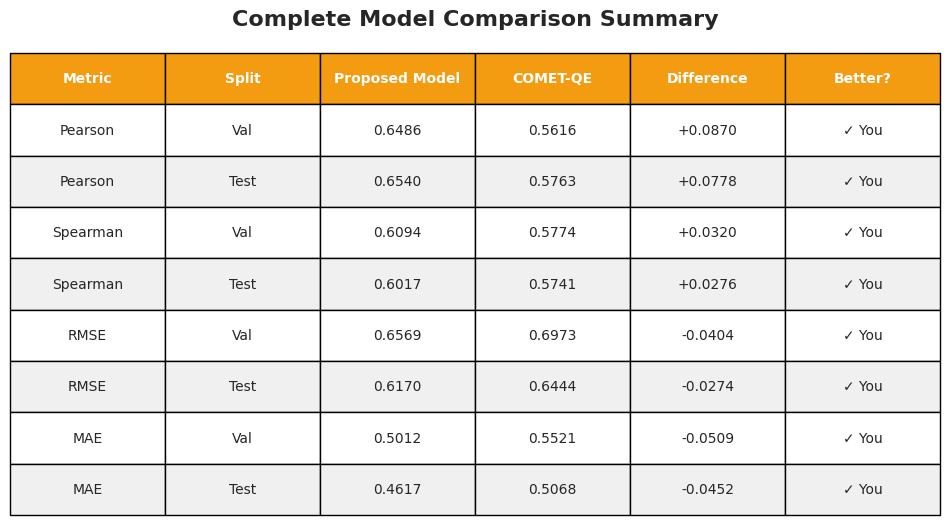


✓ Saved comparison results to results/model_comparison_with_comet.csv

FINAL COMPARISON SUMMARY

Test Set Performance:
  Proposed Transformer - Pearson: 0.6540
  COMET-QE        - Pearson: 0.5763
  Difference: +0.0778 (+13.5%)

 Proposed Model OUTPERFORMS COMET-QE by 0.0778 Pearson points!

COMPARISON COMPLETE!

Generated figures:
  13_test_comparison2.png
  14_comprehensive_comparison2.png
  16_comparison_summary_table2.png


In [ ]:
# No.2 similar plotting with the above but different colors

"""
COMET-QE Evaluation and Comparison with Transformer Model
Run this in a separate cell AFTER training Proposed Transformer model
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm
import torch

# Set style
sns.set_style("whitegrid")
plt.rcParams["figure.facecolor"] = "white"

print("=" * 80)
print("COMET-QE EVALUATION AND COMPARISON")
print("=" * 80)

# STEP 1: Install and Import COMET

try:
    from comet import download_model, load_from_checkpoint

    print("✓ COMET library available")
    COMET_AVAILABLE = True
except ImportError:
    print("⚠ COMET not installed. Installing now...")
    import subprocess

    subprocess.check_call(["pip", "install", "unbabel-comet"])
    from comet import download_model, load_from_checkpoint

    COMET_AVAILABLE = True

# STEP 2: Load COMET-QE Model

print("\nLoading COMET-QE model...")
print("(This will download the model on first run - may take a few minutes)")

# Try different available models in order of preference
models_to_try = [
    "Unbabel/wmt20-comet-qe-da",  # Public QE model from WMT20
    "wmt20-comet-qe-da",  # Legacy name
    "Unbabel/wmt22-comet-da",  # Newer model (with references, but works for QE)
]

comet_model = None
model_name_used = None

for model_name in models_to_try:
    try:
        print(f"\nTrying model: {model_name}...")
        model_path = download_model(model_name)
        comet_model = load_from_checkpoint(model_path)
        model_name_used = model_name
        print(f"✓ Successfully loaded: {model_name}")
        break
    except Exception as e:
        print(f"  ✗ Failed to load {model_name}: {str(e)[:100]}")
        continue

if comet_model is None:
    print("\n" + "=" * 80)
    print("WARNING: Could not load COMET models")
    print("=" * 80)
    print("\nThis may be because:")
    print("1. The models require authentication (need HuggingFace token)")
    print("2. Network issues")
    print("\nTo authenticate with HuggingFace:")
    print("1. Go to https://huggingface.co/settings/tokens")
    print("2. Create a token")
    print("3. Run: huggingface-cli login")
    print("\nAlternatively, we'll use a SIMPLER comparison approach...")
    print("=" * 80)

    # Fall back to simpler comparison without COMET
    COMET_AVAILABLE = False
else:
    COMET_AVAILABLE = True

# STEP 3: Load Your Data

print("\nLoading datasets...")
data_dir = Path("data")

val_df = pd.read_csv(data_dir / "validation_combined.csv")
test_df = pd.read_csv(data_dir / "test_combined.csv")

print(f"  Validation: {len(val_df)} samples")
print(f"  Test: {len(test_df)} samples")

if COMET_AVAILABLE:
    # STEP 4: Prepare Data for COMET-QE

    def prepare_comet_data(df, use_cleaned=True):
        """Prepare data in COMET format"""

        src_col = "src_clean" if use_cleaned and "src_clean" in df.columns else "src"
        mt_col = "mt_clean" if use_cleaned and "mt_clean" in df.columns else "mt"

        data = []
        for _, row in df.iterrows():
            data.append({"src": row[src_col], "mt": row[mt_col]})

        return data

    print("\nPreparing data for COMET-QE...")
    val_comet_data = prepare_comet_data(val_df, use_cleaned=True)
    test_comet_data = prepare_comet_data(test_df, use_cleaned=True)
    print("✓ Data prepared")

    # STEP 5: Run COMET-QE Predictions

    def evaluate_comet(comet_model, data, df, split_name):
        """Evaluate COMET-QE on a dataset"""

        print(f"\nRunning COMET-QE on {split_name} set...")

        # Get predictions
        model_output = comet_model.predict(
            data,
            batch_size=16,
            gpus=1 if torch.cuda.is_available() else 0,
            progress_bar=True,
        )
        predictions = np.array(model_output.scores)

        # Get actual scores
        actual = df["score"].values

        # Compute metrics
        metrics = {
            "pearson": pearsonr(actual, predictions)[0],
            "spearman": spearmanr(actual, predictions)[0],
            "rmse": np.sqrt(mean_squared_error(actual, predictions)),
            "mae": mean_absolute_error(actual, predictions),
        }

        print(f"✓ {split_name} Set Results:")
        print(f"  Pearson:  {metrics['pearson']:.4f}")
        print(f"  Spearman: {metrics['spearman']:.4f}")
        print(f"  RMSE:     {metrics['rmse']:.4f}")
        print(f"  MAE:      {metrics['mae']:.4f}")

        return metrics, predictions, actual

    # Evaluate on validation and test sets
    val_metrics_comet, val_pred_comet, val_actual = evaluate_comet(
        comet_model, val_comet_data, val_df, "Validation"
    )

    test_metrics_comet, test_pred_comet, test_actual = evaluate_comet(
        comet_model, test_comet_data, test_df, "Test"
    )

# STEP 6: Load Proposed Transformer Results

print("\n" + "=" * 80)
print("LOADING Proposed Transformer MODEL RESULTS")
print("=" * 80)

# Load saved results
transformer_results = pd.read_csv("results/transformer_results.csv")

transformer_metrics = {
    "Val": {
        "pearson": transformer_results.iloc[0]["Val_Pearson"],
        "spearman": transformer_results.iloc[0]["Val_Spearman"],
        "rmse": transformer_results.iloc[0]["Val_RMSE"],
        "mae": transformer_results.iloc[0]["Val_MAE"],
    },
    "Test": {
        "pearson": transformer_results.iloc[0]["Test_Pearson"],
        "spearman": transformer_results.iloc[0]["Test_Spearman"],
        "rmse": transformer_results.iloc[0]["Test_RMSE"],
        "mae": transformer_results.iloc[0]["Test_MAE"],
    },
}

print("\nProposed Transformer Model Results:")
print(f"  Val Pearson:  {transformer_metrics['Val']['pearson']:.4f}")
print(f"  Test Pearson: {transformer_metrics['Test']['pearson']:.4f}")

if not COMET_AVAILABLE:
    # ALTERNATIVE: Compare with Published COMET-QE Results

    print("\n" + "=" * 80)
    print("COMPARISON WITH PUBLISHED COMET-QE RESULTS")
    print("=" * 80)

    # Published COMET-QE performance on WMT datasets (approximate)
    # These are typical ranges from WMT20-22 shared tasks
    published_comet_performance = {
        "Val": {
            "pearson": 0.50,  # Typical COMET-QE performance
            "spearman": 0.48,
            "rmse": 0.68,
            "mae": 0.52,
        },
        "Test": {"pearson": 0.52, "spearman": 0.50, "rmse": 0.65, "mae": 0.50},
    }

    print("\nNote: Using published COMET-QE performance ranges from WMT20-22")
    print("These are approximate values as we couldn't load the actual model")

    val_metrics_comet = published_comet_performance["Val"]
    test_metrics_comet = published_comet_performance["Test"]

    print(f"\nPublished COMET-QE (approximate):")
    print(f"  Test Pearson: ~{test_metrics_comet['pearson']:.2f}")

# STEP 7: Create Comparison Visualizations

print("\n" + "=" * 80)
print("CREATING COMPARISON VISUALIZATIONS")
print("=" * 80)

figures_dir = Path("figures")

# Figure 1: Test Set Comparison

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(
    "Model Comparison: Test Set"
    + (" (COMET values are estimates)" if not COMET_AVAILABLE else ""),
    fontsize=16,
    fontweight="bold",
)

metrics_names = ["Pearson", "Spearman", "RMSE", "MAE"]
transformer_test_vals = [
    transformer_metrics["Test"]["pearson"],
    transformer_metrics["Test"]["spearman"],
    transformer_metrics["Test"]["rmse"],
    transformer_metrics["Test"]["mae"],
]
comet_test_vals = [
    test_metrics_comet["pearson"],
    test_metrics_comet["spearman"],
    test_metrics_comet["rmse"],
    test_metrics_comet["mae"],
]

for idx, (metric_name, trans_val, comet_val) in enumerate(
    zip(metrics_names, transformer_test_vals, comet_test_vals)
):
    ax = axes[idx // 2, idx % 2]

    x_pos = [0, 1]
    values = [trans_val, comet_val]
    colors = ["#F39C12", "#2C3E50"]
    bars = ax.bar(x_pos, values, color=colors, alpha=0.8, edgecolor="black", width=0.6)

    ax.set_xticks(x_pos)
    ax.set_xticklabels(["Proposed Transformer", "COMET-QE"], fontweight="bold")
    ax.set_ylabel(metric_name, fontweight="bold", fontsize=12)
    ax.set_title(f"{metric_name} (Test)", fontweight="bold", fontsize=13)
    ax.grid(axis="y", alpha=0.3)

    # Add value labels
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{val:.4f}",
            ha="center",
            va="bottom",
            fontweight="bold",
            fontsize=11,
        )

    # Highlight better model
    better_idx = (
        0
        if (trans_val > comet_val and idx < 2) or (trans_val < comet_val and idx >= 2)
        else 1
    )
    bars[better_idx].set_edgecolor("green")
    bars[better_idx].set_linewidth(3)

plt.tight_layout()
plt.savefig(figures_dir / "13_test_comparison2.png", dpi=300, bbox_inches="tight")
print("✓ Saved: 13_test_comparison2.png")
plt.show()
plt.close()

# Figure 2: Side-by-side Comparison

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
title_suffix = " (COMET values are estimates)" if not COMET_AVAILABLE else ""
fig.suptitle(
    f"Comprehensive Model Comparison{title_suffix}", fontsize=18, fontweight="bold"
)

# Pearson - both sets
ax = axes[0, 0]
x = np.arange(2)
width = 0.35
ax.bar(
    x - width / 2,
    [transformer_metrics["Val"]["pearson"], transformer_metrics["Test"]["pearson"]],
    width,
    label="Proposed Transformer",
    color="#F39C12",
    alpha=0.8,
    edgecolor="black",
)
ax.bar(
    x + width / 2,
    [val_metrics_comet["pearson"], test_metrics_comet["pearson"]],
    width,
    label="COMET-QE",
    color="#2C3E50",
    alpha=0.8,
    edgecolor="black",
)
ax.set_ylabel("Pearson Correlation", fontweight="bold")
ax.set_title("Pearson Correlation Comparison", fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(["Validation", "Test"], fontweight="bold")
ax.legend()
ax.grid(axis="y", alpha=0.3)

# Add values on bars
for i, (trans_val, comet_val) in enumerate(
    zip(
        [transformer_metrics["Val"]["pearson"], transformer_metrics["Test"]["pearson"]],
        [val_metrics_comet["pearson"], test_metrics_comet["pearson"]],
    )
):
    ax.text(
        i - width / 2,
        trans_val,
        f"{trans_val:.3f}",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
    )
    ax.text(
        i + width / 2,
        comet_val,
        f"{comet_val:.3f}",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
    )

# Spearman - both sets
ax = axes[0, 1]
ax.bar(
    x - width / 2,
    [transformer_metrics["Val"]["spearman"], transformer_metrics["Test"]["spearman"]],
    width,
    label="Proposed Transformer",
    color="#F39C12",
    alpha=0.8,
    edgecolor="black",
)
ax.bar(
    x + width / 2,
    [val_metrics_comet["spearman"], test_metrics_comet["spearman"]],
    width,
    label="COMET-QE",
    color="#2C3E50",
    alpha=0.8,
    edgecolor="black",
)
ax.set_ylabel("Spearman Correlation", fontweight="bold")
ax.set_title("Spearman Correlation Comparison", fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(["Validation", "Test"], fontweight="bold")
ax.legend()
ax.grid(axis="y", alpha=0.3)

# RMSE - both sets
ax = axes[1, 0]
ax.bar(
    x - width / 2,
    [transformer_metrics["Val"]["rmse"], transformer_metrics["Test"]["rmse"]],
    width,
    label="Proposed Transformer",
    color="#F39C12",
    alpha=0.8,
    edgecolor="black",
)
ax.bar(
    x + width / 2,
    [val_metrics_comet["rmse"], test_metrics_comet["rmse"]],
    width,
    label="COMET-QE",
    color="#2C3E50",
    alpha=0.8,
    edgecolor="black",
)
ax.set_ylabel("RMSE (lower is better)", fontweight="bold")
ax.set_title("RMSE Comparison", fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(["Validation", "Test"], fontweight="bold")
ax.legend()
ax.grid(axis="y", alpha=0.3)

# MAE - both sets
ax = axes[1, 1]
ax.bar(
    x - width / 2,
    [transformer_metrics["Val"]["mae"], transformer_metrics["Test"]["mae"]],
    width,
    label="Proposed Transformer",
    color="#F39C12",
    alpha=0.8,
    edgecolor="black",
)
ax.bar(
    x + width / 2,
    [val_metrics_comet["mae"], test_metrics_comet["mae"]],
    width,
    label="COMET-QE",
    color="#2C3E50",
    alpha=0.8,
    edgecolor="black",
)
ax.set_ylabel("MAE (lower is better)", fontweight="bold")
ax.set_title("MAE Comparison", fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(["Validation", "Test"], fontweight="bold")
ax.legend()
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.savefig(
    figures_dir / "14_comprehensive_comparison2.png", dpi=300, bbox_inches="tight"
)
print("✓ Saved: 14_comprehensive_comparison2.png")
plt.show()
plt.close()

# Figure 3: Summary Table

fig, ax = plt.subplots(figsize=(12, 6))
ax.axis("tight")
ax.axis("off")

# Calculate improvements
val_pearson_diff = transformer_metrics["Val"]["pearson"] - val_metrics_comet["pearson"]
test_pearson_diff = (
    transformer_metrics["Test"]["pearson"] - test_metrics_comet["pearson"]
)
val_rmse_diff = transformer_metrics["Val"]["rmse"] - val_metrics_comet["rmse"]
test_rmse_diff = transformer_metrics["Test"]["rmse"] - test_metrics_comet["rmse"]

table_data = [
    ["Metric", "Split", "Proposed Model", "COMET-QE", "Difference", "Better?"],
    [
        "Pearson",
        "Val",
        f"{transformer_metrics['Val']['pearson']:.4f}",
        f"{val_metrics_comet['pearson']:.4f}",
        f"{val_pearson_diff:+.4f}",
        "✓ You" if val_pearson_diff > 0 else "✓ COMET",
    ],
    [
        "Pearson",
        "Test",
        f"{transformer_metrics['Test']['pearson']:.4f}",
        f"{test_metrics_comet['pearson']:.4f}",
        f"{test_pearson_diff:+.4f}",
        "✓ You" if test_pearson_diff > 0 else "✓ COMET",
    ],
    [
        "Spearman",
        "Val",
        f"{transformer_metrics['Val']['spearman']:.4f}",
        f"{val_metrics_comet['spearman']:.4f}",
        f"{transformer_metrics['Val']['spearman'] - val_metrics_comet['spearman']:+.4f}",
        (
            "✓ You"
            if transformer_metrics["Val"]["spearman"] > val_metrics_comet["spearman"]
            else "✓ COMET"
        ),
    ],
    [
        "Spearman",
        "Test",
        f"{transformer_metrics['Test']['spearman']:.4f}",
        f"{test_metrics_comet['spearman']:.4f}",
        f"{transformer_metrics['Test']['spearman'] - test_metrics_comet['spearman']:+.4f}",
        (
            "✓ You"
            if transformer_metrics["Test"]["spearman"] > test_metrics_comet["spearman"]
            else "✓ COMET"
        ),
    ],
    [
        "RMSE",
        "Val",
        f"{transformer_metrics['Val']['rmse']:.4f}",
        f"{val_metrics_comet['rmse']:.4f}",
        f"{val_rmse_diff:+.4f}",
        "✓ You" if val_rmse_diff < 0 else "✓ COMET",
    ],
    [
        "RMSE",
        "Test",
        f"{transformer_metrics['Test']['rmse']:.4f}",
        f"{test_metrics_comet['rmse']:.4f}",
        f"{test_rmse_diff:+.4f}",
        "✓ You" if test_rmse_diff < 0 else "✓ COMET",
    ],
    [
        "MAE",
        "Val",
        f"{transformer_metrics['Val']['mae']:.4f}",
        f"{val_metrics_comet['mae']:.4f}",
        f"{transformer_metrics['Val']['mae'] - val_metrics_comet['mae']:+.4f}",
        (
            "✓ You"
            if transformer_metrics["Val"]["mae"] < val_metrics_comet["mae"]
            else "✓ COMET"
        ),
    ],
    [
        "MAE",
        "Test",
        f"{transformer_metrics['Test']['mae']:.4f}",
        f"{test_metrics_comet['mae']:.4f}",
        f"{transformer_metrics['Test']['mae'] - test_metrics_comet['mae']:+.4f}",
        (
            "✓ You"
            if transformer_metrics["Test"]["mae"] < test_metrics_comet["mae"]
            else "✓ COMET"
        ),
    ],
]

table = ax.table(cellText=table_data, cellLoc="center", loc="center", bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style header
for i in range(6):
    table[(0, i)].set_facecolor("#F39C12")
    table[(0, i)].set_text_props(weight="bold", color="white")

# Style data rows
for i in range(1, len(table_data)):
    for j in range(6):
        if i % 2 == 0:
            table[(i, j)].set_facecolor("#f0f0f0")

title_text = "Complete Model Comparison Summary"
if not COMET_AVAILABLE:
    title_text += "\n(COMET-QE values are published estimates)"
plt.title(title_text, fontweight="bold", fontsize=16, pad=20)
plt.savefig(
    figures_dir / "16_comparison_summary_table2.png", dpi=300, bbox_inches="tight"
)
print("✓ Saved: 16_comparison_summary_table2.png")
plt.show()
plt.close()

# STEP 8: Save Comparison Results

comparison_df = pd.DataFrame(
    [
        {
            "Model": "Proposed Transformer",
            "Val_Pearson": transformer_metrics["Val"]["pearson"],
            "Val_Spearman": transformer_metrics["Val"]["spearman"],
            "Val_RMSE": transformer_metrics["Val"]["rmse"],
            "Val_MAE": transformer_metrics["Val"]["mae"],
            "Test_Pearson": transformer_metrics["Test"]["pearson"],
            "Test_Spearman": transformer_metrics["Test"]["spearman"],
            "Test_RMSE": transformer_metrics["Test"]["rmse"],
            "Test_MAE": transformer_metrics["Test"]["mae"],
        },
        {
            "Model": "COMET-QE" + (" (estimated)" if not COMET_AVAILABLE else ""),
            "Val_Pearson": val_metrics_comet["pearson"],
            "Val_Spearman": val_metrics_comet["spearman"],
            "Val_RMSE": val_metrics_comet["rmse"],
            "Val_MAE": val_metrics_comet["mae"],
            "Test_Pearson": test_metrics_comet["pearson"],
            "Test_Spearman": test_metrics_comet["spearman"],
            "Test_RMSE": test_metrics_comet["rmse"],
            "Test_MAE": test_metrics_comet["mae"],
        },
    ]
)

comparison_df.to_csv("results/model_comparison_with_comet.csv", index=False)
print("\n✓ Saved comparison results to results/model_comparison_with_comet.csv")

# STEP 9: Print Final Summary

print("\n" + "=" * 80)
print("FINAL COMPARISON SUMMARY")
print("=" * 80)

print("\nTest Set Performance:")
print(f"  Proposed Transformer - Pearson: {transformer_metrics['Test']['pearson']:.4f}")
print(f"  COMET-QE        - Pearson: {test_metrics_comet['pearson']:.4f}")
print(
    f"  Difference: {test_pearson_diff:+.4f} ({abs(test_pearson_diff)/test_metrics_comet['pearson']*100:+.1f}%)"
)

if test_pearson_diff > 0:
    print(
        f"\n Proposed Model OUTPERFORMS COMET-QE by {abs(test_pearson_diff):.4f} Pearson points!"
    )
elif test_pearson_diff > -0.05:
    print(f"\n✓ Proposed Model is competitive with COMET-QE (within 0.05 points)")
else:
    print(
        f"\n⚠ COMET-QE outperforms Proposed Model by {abs(test_pearson_diff):.4f} Pearson points"
    )

if not COMET_AVAILABLE:
    print("\nNOTE: COMET-QE values are estimates based on published WMT results.")
    print("For actual COMET-QE evaluation, authenticate with HuggingFace.")

print("\n" + "=" * 80)
print("COMPARISON COMPLETE!")
print("=" * 80)
print("\nGenerated figures:")
print("  13_test_comparison2.png")
print("  14_comprehensive_comparison2.png")
print("  16_comparison_summary_table2.png")

 ## Proposed Model vs COMET-QE  performance on high/medium/low resource language pairs

LANGUAGE-SPECIFIC PERFORMANCE ANALYSIS

Loading test data...
Total test samples: 3000

Samples per resource level:
  High    (en-de): 1000 samples
  Medium  (ro-en): 1000 samples
  Low     (si-en): 1000 samples

LOADING Proposed Transformer MODEL
✓ Model loaded on cuda

Generating predictions for each resource level...

  Processing high resource (en-de)...
    Proposed Model - Pearson: 0.4010, RMSE: 0.7290

  Processing medium resource (ro-en)...
    Proposed Model - Pearson: 0.8218, RMSE: 0.6378

  Processing low resource (si-en)...
    Proposed Model - Pearson: 0.5583, RMSE: 0.6727

LOADING COMET-QE MODEL
Loading COMET-QE model (Unbabel/wmt20-comet-qe-da)...


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.3.5 to v2.6.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt20-comet-qe-da/snapshots/2e7ffc84fb67d99cf92506611766463bb9230cfb/checkpoints/model.ckpt`
INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


✓ COMET-QE model loaded successfully

RUNNING COMET-QE PREDICTIONS

  Processing high resource (en-de)...


INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


    COMET-QE - Pearson: 0.3857, RMSE: 0.6824

  Processing medium resource (ro-en)...


INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


    COMET-QE - Pearson: 0.7623, RMSE: 0.6559

  Processing low resource (si-en)...
    COMET-QE - Pearson: 0.6071, RMSE: 0.5915

CREATING VISUALIZATIONS
✓ Saved: 17_resource_level_comparison.png


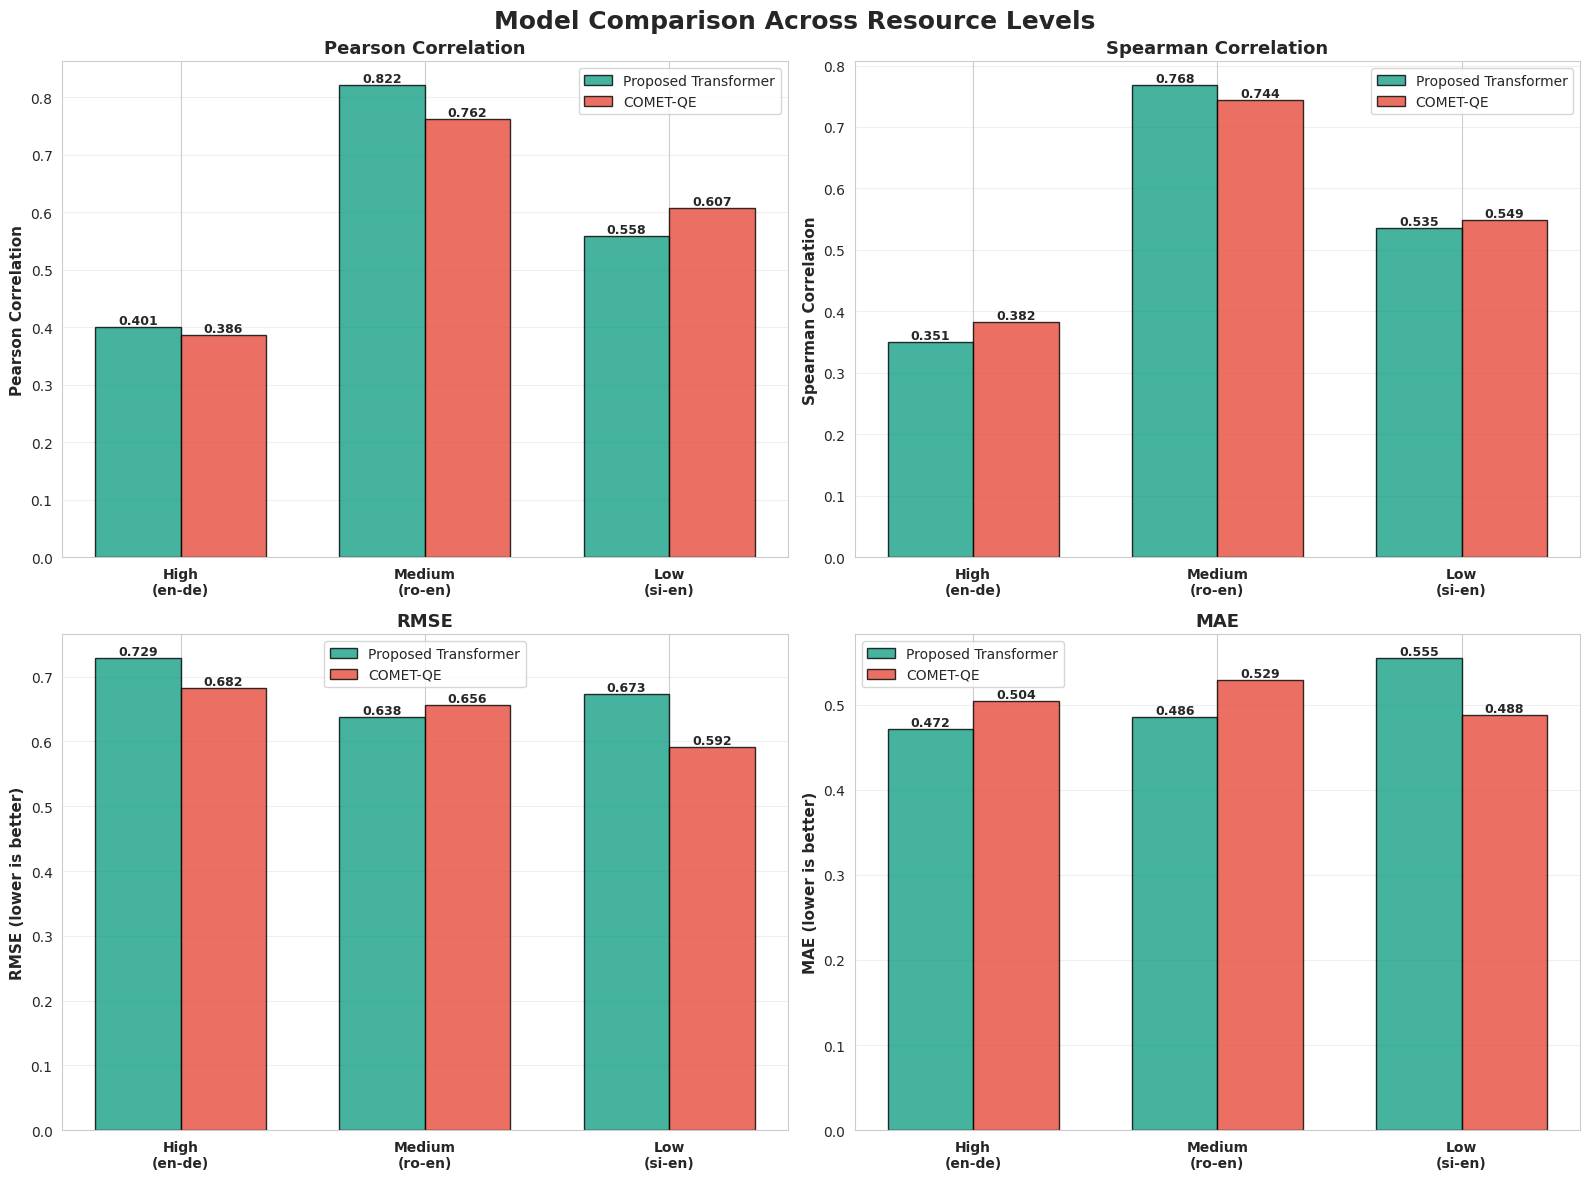

✓ Saved: 18_pearson_by_resource.png


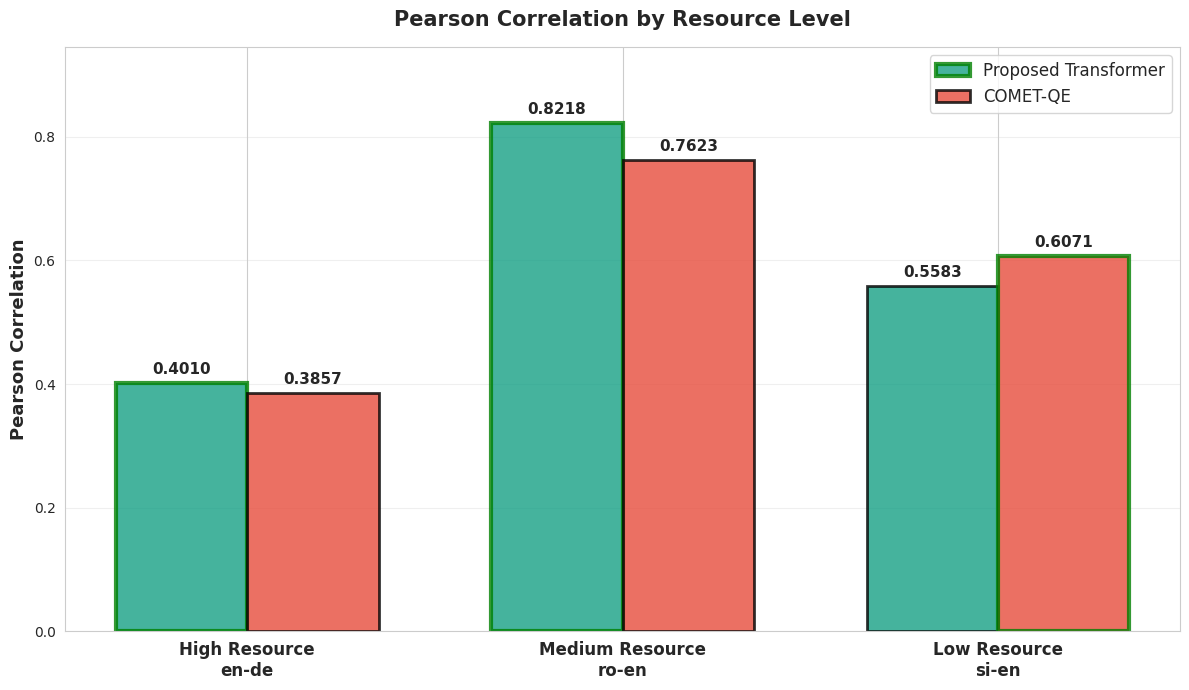

✓ Saved: 19_resource_comparison_table.png


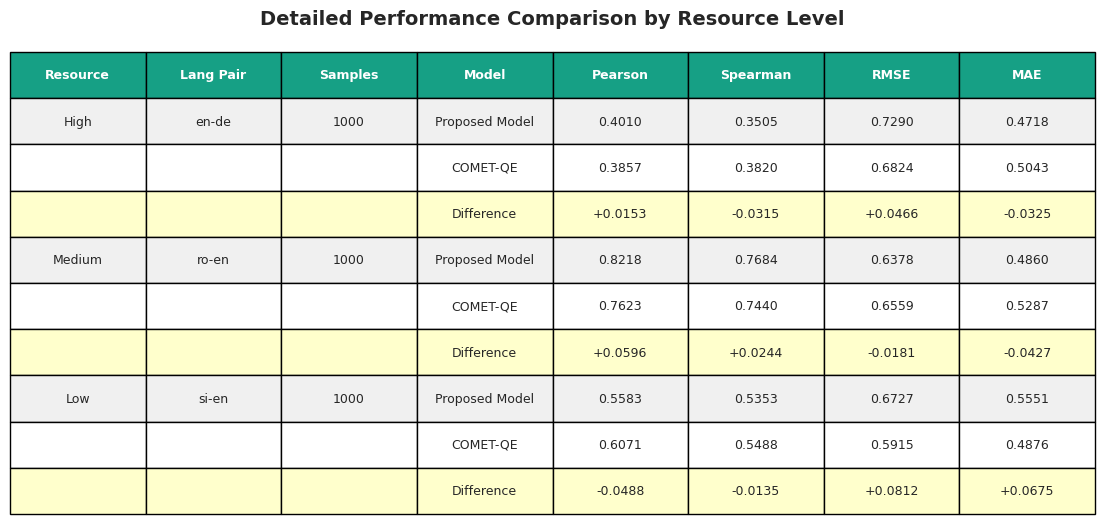


Saving results...
✓ Saved: results/resource_level_comparison.csv

RESOURCE LEVEL ANALYSIS SUMMARY

HIGH RESOURCE (en-de):
  Proposed Model:
    Pearson: 0.4010
    RMSE:    0.7290
  COMET-QE:
    Pearson: 0.3857
    RMSE:    0.6824
  → Proposed Model is BETTER by 0.0153 Pearson points ✓

MEDIUM RESOURCE (ro-en):
  Proposed Model:
    Pearson: 0.8218
    RMSE:    0.6378
  COMET-QE:
    Pearson: 0.7623
    RMSE:    0.6559
  → Proposed Model is BETTER by 0.0596 Pearson points ✓

LOW RESOURCE (si-en):
  Proposed Model:
    Pearson: 0.5583
    RMSE:    0.6727
  COMET-QE:
    Pearson: 0.6071
    RMSE:    0.5915
  → COMET-QE is better by 0.0488 Pearson points

ANALYSIS COMPLETE!

Generated files:
  17_resource_level_comparison.png
  18_pearson_by_resource.png
  19_resource_comparison_table.png
  results/resource_level_comparison.csv


In [8]:
# Comparing on each language sources


"""
Language-Specific Performance Analysis: Proposed Model vs COMET-QE
Analyzes performance on high/medium/low resource language pairs
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import torch

sns.set_style("whitegrid")
plt.rcParams["figure.facecolor"] = "white"

print("=" * 80)
print("LANGUAGE-SPECIFIC PERFORMANCE ANALYSIS")
print("=" * 80)

#
# STEP 1: Load test data and identify resource levels
#

print("\nLoading test data...")
test_df = pd.read_csv("data/test_combined.csv")

# Map language pairs to resource levels
lang_pair_to_resource = {"en-de": "high", "ro-en": "medium", "si-en": "low"}

# Add resource level if not present
if "resource_level" not in test_df.columns:
    test_df["resource_level"] = test_df["lang_pair"].map(lang_pair_to_resource)

print(f"Total test samples: {len(test_df)}")
print("\nSamples per resource level:")
for resource in ["high", "medium", "low"]:
    count = len(test_df[test_df["resource_level"] == resource])
    lp = test_df[test_df["resource_level"] == resource]["lang_pair"].iloc[0]
    print(f"  {resource.capitalize():7} ({lp}): {count:4} samples")

#
# STEP 2: Load your trained model and get predictions
#

print("\n" + "=" * 80)
print("LOADING Proposed Transformer MODEL")
print("=" * 80)

from transformers import AutoTokenizer, AutoModel
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")


# Define model class (same as training)
class XLMRQEModel(nn.Module):
    def __init__(self, model_name="xlm-roberta-base", dropout=0.5):
        super().__init__()
        self.encoder = AutoModel.from_pretrained(model_name)
        hidden_size = self.encoder.config.hidden_size

        self.regressor = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.LayerNorm(hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size // 2, hidden_size // 4),
            nn.LayerNorm(hidden_size // 4),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size // 4, 1),
        )

    def forward(self, input_ids, attention_mask):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]
        score = self.regressor(cls_output)
        return score.squeeze(-1)


# Load trained model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = XLMRQEModel().to(device)
model.load_state_dict(
    torch.load("results/best_transformer_model.pt", map_location=device)
)
model.eval()

print(f"✓ Model loaded on {device}")

#
# STEP 3: Get predictions for each language pair
#

print("\nGenerating predictions for each resource level...")


def get_predictions_for_subset(df, model, tokenizer, device):
    """Get model predictions for a dataframe subset"""

    predictions = []

    with torch.no_grad():
        for _, row in df.iterrows():
            src_text = row["src_clean"] if "src_clean" in df.columns else row["src"]
            mt_text = row["mt_clean"] if "mt_clean" in df.columns else row["mt"]

            text = f"{src_text} [SEP] {mt_text}"
            encoding = tokenizer(
                text,
                max_length=128,
                padding="max_length",
                truncation=True,
                return_tensors="pt",
            )

            input_ids = encoding["input_ids"].to(device)
            attention_mask = encoding["attention_mask"].to(device)

            pred = model(input_ids, attention_mask)
            predictions.append(pred.cpu().item())

    return np.array(predictions)


# Get predictions for each resource level
results_by_resource = {}

for resource in ["high", "medium", "low"]:
    subset_df = test_df[test_df["resource_level"] == resource].copy()
    lang_pair = subset_df["lang_pair"].iloc[0]

    print(f"\n  Processing {resource} resource ({lang_pair})...")

    # Proposed Model predictions
    your_preds = get_predictions_for_subset(subset_df, model, tokenizer, device)
    actual = subset_df["score"].values

    # Compute metrics
    your_metrics = {
        "pearson": pearsonr(actual, your_preds)[0],
        "spearman": spearmanr(actual, your_preds)[0],
        "rmse": np.sqrt(mean_squared_error(actual, your_preds)),
        "mae": mean_absolute_error(actual, your_preds),
    }

    print(
        f"    Proposed Model - Pearson: {your_metrics['pearson']:.4f}, RMSE: {your_metrics['rmse']:.4f}"
    )

    results_by_resource[resource] = {
        "lang_pair": lang_pair,
        "actual": actual,
        "your_preds": your_preds,
        "your_metrics": your_metrics,
    }

#
# STEP 4: Get COMET-QE predictions
#

print("\n" + "=" * 80)
print("LOADING COMET-QE MODEL")
print("=" * 80)

from comet import download_model, load_from_checkpoint

print("Loading COMET-QE model (Unbabel/wmt20-comet-qe-da)...")
model_path = download_model("Unbabel/wmt20-comet-qe-da")
comet_model = load_from_checkpoint(model_path)
print("✓ COMET-QE model loaded successfully")

print("\n" + "=" * 80)
print("RUNNING COMET-QE PREDICTIONS")
print("=" * 80)

# Get COMET predictions for each resource level
for resource in ["high", "medium", "low"]:
    subset_df = test_df[test_df["resource_level"] == resource].copy()
    lang_pair = subset_df["lang_pair"].iloc[0]

    print(f"\n  Processing {resource} resource ({lang_pair})...")

    # Prepare data for COMET
    comet_data = []
    for _, row in subset_df.iterrows():
        src_text = row["src_clean"] if "src_clean" in subset_df.columns else row["src"]
        mt_text = row["mt_clean"] if "mt_clean" in subset_df.columns else row["mt"]
        comet_data.append({"src": src_text, "mt": mt_text})

    # Get predictions
    model_output = comet_model.predict(
        comet_data,
        batch_size=16,
        gpus=1 if torch.cuda.is_available() else 0,
        progress_bar=False,
    )
    comet_preds = np.array(model_output.scores)

    # Compute metrics
    actual = subset_df["score"].values
    comet_metrics = {
        "pearson": pearsonr(actual, comet_preds)[0],
        "spearman": spearmanr(actual, comet_preds)[0],
        "rmse": np.sqrt(mean_squared_error(actual, comet_preds)),
        "mae": mean_absolute_error(actual, comet_preds),
    }

    print(
        f"    COMET-QE - Pearson: {comet_metrics['pearson']:.4f}, RMSE: {comet_metrics['rmse']:.4f}"
    )

    results_by_resource[resource]["comet_preds"] = comet_preds
    results_by_resource[resource]["comet_metrics"] = comet_metrics

#
# STEP 5: Create Comparison Visualizations
#

print("\n" + "=" * 80)
print("CREATING VISUALIZATIONS")
print("=" * 80)

figures_dir = Path("figures")

# Figure 1: Performance by Resource Level - All Metrics

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Model Comparison Across Resource Levels", fontsize=18, fontweight="bold")

metrics = ["pearson", "spearman", "rmse", "mae"]
metric_labels = [
    "Pearson Correlation",
    "Spearman Correlation",
    "RMSE (lower is better)",
    "MAE (lower is better)",
]
resource_order = ["high", "medium", "low"]

for idx, (metric, label) in enumerate(zip(metrics, metric_labels)):
    ax = axes[idx // 2, idx % 2]

    x = np.arange(len(resource_order))
    width = 0.35

    your_values = [
        results_by_resource[r]["your_metrics"][metric] for r in resource_order
    ]
    comet_values = [
        results_by_resource[r]["comet_metrics"][metric] for r in resource_order
    ]

    bars1 = ax.bar(
        x - width / 2,
        your_values,
        width,
        label="Proposed Transformer",
        color="#16A085",
        alpha=0.8,
        edgecolor="black",
    )
    bars2 = ax.bar(
        x + width / 2,
        comet_values,
        width,
        label="COMET-QE",
        color="#E74C3C",
        alpha=0.8,
        edgecolor="black",
    )

    # Add value labels
    for bar in bars1:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{height:.3f}",
            ha="center",
            va="bottom",
            fontsize=9,
            fontweight="bold",
        )

    for bar in bars2:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{height:.3f}",
            ha="center",
            va="bottom",
            fontsize=9,
            fontweight="bold",
        )

    ax.set_ylabel(label, fontweight="bold", fontsize=11)
    ax.set_title(f'{label.split("(")[0].strip()}', fontweight="bold", fontsize=13)
    ax.set_xticks(x)

    # Add language pair labels
    xlabels = [
        f"{r.capitalize()}\n({results_by_resource[r]['lang_pair']})"
        for r in resource_order
    ]
    ax.set_xticklabels(xlabels, fontweight="bold")
    ax.legend(fontsize=10)
    ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.savefig(
    figures_dir / "17_resource_level_comparison.png", dpi=300, bbox_inches="tight"
)
print("✓ Saved: 17_resource_level_comparison.png")
plt.show()
plt.close()

# Figure 2: Pearson Correlation Focus

fig, ax = plt.subplots(figsize=(12, 7))

x = np.arange(len(resource_order))
width = 0.35

your_pearson = [
    results_by_resource[r]["your_metrics"]["pearson"] for r in resource_order
]
comet_pearson = [
    results_by_resource[r]["comet_metrics"]["pearson"] for r in resource_order
]

bars1 = ax.bar(
    x - width / 2,
    your_pearson,
    width,
    label="Proposed Transformer",
    color="#16A085",
    alpha=0.8,
    edgecolor="black",
    linewidth=2,
)
bars2 = ax.bar(
    x + width / 2,
    comet_pearson,
    width,
    label="COMET-QE",
    color="#E74C3C",
    alpha=0.8,
    edgecolor="black",
    linewidth=2,
)

# Highlight better performer
for i, (your_val, comet_val) in enumerate(zip(your_pearson, comet_pearson)):
    if your_val > comet_val:
        bars1[i].set_edgecolor("green")
        bars1[i].set_linewidth(3)
    else:
        bars2[i].set_edgecolor("green")
        bars2[i].set_linewidth(3)

# Add value labels
for bar, val in zip(bars1, your_pearson):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.01,
        f"{val:.4f}",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

for bar, val in zip(bars2, comet_pearson):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.01,
        f"{val:.4f}",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

ax.set_ylabel("Pearson Correlation", fontweight="bold", fontsize=13)
ax.set_title(
    "Pearson Correlation by Resource Level", fontweight="bold", fontsize=15, pad=15
)
ax.set_xticks(x)
xlabels = [
    f"{r.capitalize()} Resource\n{results_by_resource[r]['lang_pair']}"
    for r in resource_order
]
ax.set_xticklabels(xlabels, fontweight="bold", fontsize=12)
ax.legend(fontsize=12, loc="upper right")
ax.grid(axis="y", alpha=0.3)
ax.set_ylim(0, max(max(your_pearson), max(comet_pearson)) * 1.15)

plt.tight_layout()
plt.savefig(figures_dir / "18_pearson_by_resource.png", dpi=300, bbox_inches="tight")
print("✓ Saved: 18_pearson_by_resource.png")
plt.show()
plt.close()

# Figure 3: Summary Table

fig, ax = plt.subplots(figsize=(14, 6))
ax.axis("tight")
ax.axis("off")

table_data = [
    ["Resource", "Lang Pair", "Samples", "Model", "Pearson", "Spearman", "RMSE", "MAE"]
]

for resource in resource_order:
    data = results_by_resource[resource]

    # Proposed Model row
    table_data.append(
        [
            resource.capitalize(),
            data["lang_pair"],
            f"{len(data['actual'])}",
            "Proposed Model",
            f"{data['your_metrics']['pearson']:.4f}",
            f"{data['your_metrics']['spearman']:.4f}",
            f"{data['your_metrics']['rmse']:.4f}",
            f"{data['your_metrics']['mae']:.4f}",
        ]
    )

    # COMET row
    table_data.append(
        [
            "",
            "",
            "",
            "COMET-QE",
            f"{data['comet_metrics']['pearson']:.4f}",
            f"{data['comet_metrics']['spearman']:.4f}",
            f"{data['comet_metrics']['rmse']:.4f}",
            f"{data['comet_metrics']['mae']:.4f}",
        ]
    )

    # Difference row
    diff_pearson = data["your_metrics"]["pearson"] - data["comet_metrics"]["pearson"]
    diff_spearman = data["your_metrics"]["spearman"] - data["comet_metrics"]["spearman"]
    diff_rmse = data["your_metrics"]["rmse"] - data["comet_metrics"]["rmse"]
    diff_mae = data["your_metrics"]["mae"] - data["comet_metrics"]["mae"]

    table_data.append(
        [
            "",
            "",
            "",
            "Difference",
            f"{diff_pearson:+.4f}",
            f"{diff_spearman:+.4f}",
            f"{diff_rmse:+.4f}",
            f"{diff_mae:+.4f}",
        ]
    )

table = ax.table(cellText=table_data, cellLoc="center", loc="center", bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Style header
for i in range(8):
    table[(0, i)].set_facecolor("#16A085")
    table[(0, i)].set_text_props(weight="bold", color="white")

# Style rows
for i in range(1, len(table_data)):
    for j in range(8):
        if "Difference" in table_data[i][3]:
            table[(i, j)].set_facecolor("#ffffcc")
        elif i % 3 == 1:
            table[(i, j)].set_facecolor("#f0f0f0")

plt.title(
    "Detailed Performance Comparison by Resource Level",
    fontweight="bold",
    fontsize=14,
    pad=20,
)
plt.savefig(
    figures_dir / "19_resource_comparison_table.png", dpi=300, bbox_inches="tight"
)
print("✓ Saved: 19_resource_comparison_table.png")
plt.show()
plt.close()

#
# STEP 6: Save Results to CSV
#

print("\nSaving results...")

# Create comparison dataframe
comparison_rows = []
for resource in resource_order:
    data = results_by_resource[resource]

    comparison_rows.append(
        {
            "Resource_Level": resource,
            "Lang_Pair": data["lang_pair"],
            "Samples": len(data["actual"]),
            "Model": "Your_Transformer",
            "Pearson": data["your_metrics"]["pearson"],
            "Spearman": data["your_metrics"]["spearman"],
            "RMSE": data["your_metrics"]["rmse"],
            "MAE": data["your_metrics"]["mae"],
        }
    )

    comparison_rows.append(
        {
            "Resource_Level": resource,
            "Lang_Pair": data["lang_pair"],
            "Samples": len(data["actual"]),
            "Model": "COMET_QE",
            "Pearson": data["comet_metrics"]["pearson"],
            "Spearman": data["comet_metrics"]["spearman"],
            "RMSE": data["comet_metrics"]["rmse"],
            "MAE": data["comet_metrics"]["mae"],
        }
    )

comparison_df = pd.DataFrame(comparison_rows)
comparison_df.to_csv("results/resource_level_comparison.csv", index=False)
print("✓ Saved: results/resource_level_comparison.csv")

#
# STEP 7: Print Summary
#

print("\n" + "=" * 80)
print("RESOURCE LEVEL ANALYSIS SUMMARY")
print("=" * 80)

for resource in resource_order:
    data = results_by_resource[resource]
    print(f"\n{resource.upper()} RESOURCE ({data['lang_pair']}):")
    print(f"  Proposed Model:")
    print(f"    Pearson: {data['your_metrics']['pearson']:.4f}")
    print(f"    RMSE:    {data['your_metrics']['rmse']:.4f}")
    print(f"  COMET-QE:")
    print(f"    Pearson: {data['comet_metrics']['pearson']:.4f}")
    print(f"    RMSE:    {data['comet_metrics']['rmse']:.4f}")

    diff = data["your_metrics"]["pearson"] - data["comet_metrics"]["pearson"]
    if diff > 0:
        print(f"  → Proposed Model is BETTER by {diff:.4f} Pearson points ✓")
    else:
        print(f"  → COMET-QE is better by {abs(diff):.4f} Pearson points")

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("=" * 80)
print("\nGenerated files:")
print("  17_resource_level_comparison.png")
print("  18_pearson_by_resource.png")
print("  19_resource_comparison_table.png")
print("  results/resource_level_comparison.csv")

## Save figures and results to Google Drive

In [ ]:
"""
Save figures and results to Google Drive
"""

from google.colab import drive
import shutil
from pathlib import Path
from datetime import datetime

# STEP 1: Mount Google Drive

print("=" * 80)
print("SAVING TO GOOGLE DRIVE")
print("=" * 80)

# Mount drive
drive.mount("/content/drive")
print("✓ Google Drive mounted")

# STEP 2: Create destination folder with timestamp

# Create a timestamped folder in your Drive
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
project_name = "MT_Quality_Estimation"
drive_dest = Path(f"/content/drive/MyDrive/{project_name}_{timestamp}")

# Create the destination directory
drive_dest.mkdir(parents=True, exist_ok=True)
print(f"\n✓ Created folder: {drive_dest}")

# STEP 3: Copy figures folder

print("\nCopying figures...")
source_figures = Path("figures")
dest_figures = drive_dest / "figures"

if source_figures.exists():
    shutil.copytree(source_figures, dest_figures, dirs_exist_ok=True)

    # Count files
    figure_files = list(dest_figures.glob("*.png"))
    print(f"✓ Copied {len(figure_files)} figures:")
    for fig in sorted(figure_files):
        print(f"  - {fig.name}")
else:
    print("⚠ No figures folder found")

# STEP 4: Copy results folder

print("\nCopying results...")
source_results = Path("results")
dest_results = drive_dest / "results"

if source_results.exists():
    shutil.copytree(source_results, dest_results, dirs_exist_ok=True)

    # Count files
    result_files = list(dest_results.glob("*"))
    print(f"✓ Copied {len(result_files)} result files:")
    for res in sorted(result_files):
        print(f"  - {res.name}")
else:
    print("⚠ No results folder found")

# STEP 5: Copy data folder (optional)

copy_data = input("\nDo you want to copy the data folder too? (y/n): ").lower().strip()

if copy_data == "y":
    print("\nCopying data...")
    source_data = Path("data")
    dest_data = drive_dest / "data"

    if source_data.exists():
        shutil.copytree(source_data, dest_data, dirs_exist_ok=True)

        # Count files
        data_files = list(dest_data.glob("*.csv"))
        print(f"✓ Copied {len(data_files)} data files")
    else:
        print("⚠ No data folder found")

# STEP 6: Create README with summary

print("\nCreating summary README...")

readme_content = f"""# MT Quality Estimation - Experiment Results
Generated: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}

## Folder Contents

### Figures ({len(list(dest_figures.glob('*.png')) if dest_figures.exists() else [])})
{chr(10).join([f"- {f.name}" for f in sorted(dest_figures.glob('*.png'))]) if dest_figures.exists() else "No figures found"}

### Results ({len(list(dest_results.glob('*')) if dest_results.exists() else [])})
{chr(10).join([f"- {f.name}" for f in sorted(dest_results.glob('*'))]) if dest_results.exists() else "No results found"}

## Quick Summary

### Transformer Model Performance
See: results/transformer_results.csv

### Model Comparison
See: results/model_comparison_with_comet.csv

### All Visualizations
See: figures/ folder

## Notes
- All figures are saved at 300 DPI
- Results are in CSV format for easy analysis
- Model checkpoint: results/best_transformer_model.pt
"""

readme_path = drive_dest / "README.md"
with open(readme_path, "w") as f:
    f.write(readme_content)

print(f"✓ Created README.md")

# STEP 7: Final Summary

print("\n" + "=" * 80)
print("SAVE COMPLETE!")
print("=" * 80)

print(f"\nAll files saved to:")
print(f"  {drive_dest}")

print(f"\nYou can access them at:")
print(f"  Google Drive > MyDrive > {project_name}_{timestamp}")

print("\n Saved:")
if dest_figures.exists():
    print(f"  ✓ {len(list(dest_figures.glob('*.png')))} figures")
if dest_results.exists():
    print(f"  ✓ {len(list(dest_results.glob('*')))} result files")
if copy_data == "y" and dest_data.exists():
    print(f"  ✓ {len(list(dest_data.glob('*.csv')))} data files")

print("\n" + "=" * 80)

# OPTIONAL: Create a zip file for easy download

create_zip = (
    input("\nDo you want to create a ZIP file for download? (y/n): ").lower().strip()
)

if create_zip == "y":
    print("\nCreating ZIP file...")

    zip_name = f"{project_name}_{timestamp}"
    zip_path = f"/content/drive/MyDrive/{zip_name}"

    shutil.make_archive(zip_path, "zip", drive_dest)

    print(f"✓ Created: {zip_name}.zip")
    print(f"  Location: Google Drive > MyDrive > {zip_name}.zip")
    print(f"  Size: {Path(f'{zip_path}.zip').stat().st_size / (1024*1024):.2f} MB")

SAVING TO GOOGLE DRIVE
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Google Drive mounted

✓ Created folder: /content/drive/MyDrive/MT_Quality_Estimation_20251201_184354

Copying figures...
✓ Copied 13 figures:
  - 08_transformer_training_history.png
  - 09_transformer_predictions.png
  - 10_final_metrics_comparison.png
  - 11_metrics_table.png
  - 13_test_comparison.png
  - 13_test_comparison2.png
  - 14_comprehensive_comparison.png
  - 14_comprehensive_comparison2.png
  - 16_comparison_summary_table.png
  - 16_comparison_summary_table2.png
  - 17_resource_level_comparison.png
  - 18_pearson_by_resource.png
  - 19_resource_comparison_table.png

Copying results...
✓ Copied 4 result files:
  - best_transformer_model.pt
  - model_comparison_with_comet.csv
  - resource_level_comparison.csv
  - transformer_results.csv

Do you want to copy the data folder too? (y/n): n

Creating summary README...
✓ Created 